In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [21]:
im = cv2.imread("Heightmap/Taiwan/23.800,121.048.png")


In [22]:
all_height = []
for x in range(2000):
    for y in range(4000):
        pix = im[x][y]
        height = pix[0] + 255 * pix[1] + 255 ** 2 * pix[2]
        all_height.append(height)

In [23]:
len(all_height)
all_height = np.array(all_height)

In [24]:
all_height.resize(2000, 4000)

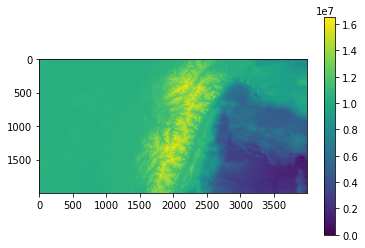

In [25]:
p = plt.imshow(all_height)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAW0AAAD4CAYAAAAn3bdmAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjAsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+17YcXAAAgAElEQVR4nOy9WawlSXrf9/sicjnL3Wvrql6mhj1DikOZlC1KNLySEmxLgmHCgGmIEmzLpkAYkPRkA9KTCfhJhgAvgCzTA4Gg+WDSsi1ZhEFLNmzIFCAJXAyK0pAcTrOne6q6uta7ni2XiM8PEZknz6lbt25V3aqu6s5/4dbZIiPjZOb5x5f/bwlRVXr06NGjx5sB81kPoEePHj16nB89affo0aPHG4SetHv06NHjDUJP2j169OjxBqEn7R49evR4g9CTdo8ePXq8QehJu0ePHl8oiMjPiMh9Efmn52j7X4nIb8S/3xWRw1cxxjPH1Mdp9+jR44sEEflXgAnwc6r6+59hu78A/LOq+h+9tMGdA72l3aNHjy8UVPWXgf3ueyLyvoj8HRH5dRH5+yLy+07Z9MeBn38lgzwDyWc9gB49evR4DfB14D9W1W+JyA8Bfw34I82HIvIl4MvA//MZja9FT9o9evT4QkNENoB/AfifRaR5O19r9ieB/0VV3asc22noSbtHjx5fdBjgUFX/wBlt/iTw517ReM5Er2n36NHjCw1VPQa+LSI/BiABP9B8LiLfA+wC//AzGuIKetLu0aPHFwoi8vMEAv4eEbktIj8B/GngJ0TkHwPfAH60s8mPA7+gr0moXR/y16NHjx5vEHpLu0ePHj3eIPSOyB49evSI+Dd+ZKyP9s8XIPLrv1n8XVX9Yy95SI+hJ+0ePXr0iHi07/iVv/veudra69+6/JKHcyp60u7Ro0ePCAU8/rMexpnoSbtHjx49IhSl+uzzZ85E74js0aNHjw78Of89DeepJigiPxwrCH5DRP7f84yvJ+0ePXr0iFAUp+f7Owd+Fniio1JEdgg1Tv4tVf0+4MfO02kvj/To0aNHB56LyV1R1V8WkZtnNPlTwN9U1e/E9vfP029vaffo0aNHhAIOPdcfcFlEfq3z95PPuLvvBnZF5O/FkrD//nk26i3tHj169OjgGSzth6r6gy+wqwT4g8AfBYbAPxSRf6Sqv/u0jXr06NGjB8HSrl5daY/bBOKfAlMR+WXgB4AzSbuXR3r06NEjQs8pjbiL0b3/NvAvi0giIiPgh4DfftpGvaXdo0ePHg0U3AUZ2rGa4A8TtO/bwE8BKYCq/rSq/raI/B3gNwEP/HVVfepiwz1p9+jRo0dEyIi8oL5Uf/wcbf4K8Feepd+etHv06NGjheCQpzf7DNGTdo8ePXpEBEdkT9o9evTo8UYgxGn3pN2jR48ebwx8b2n36NGjx5uB3tLu0aNHjzcIiuBe8/SVnrR79OjRo4NeHunRo0ePNwSKUKr9rIdxJnrS7tGjR4+IkFzTyyM9evTo8cagd0T26NGjxxsCVcFpb2n36NGjxxsD31vaPXr06PFmIDgiX29afL1H16NHjx6vEL0jskePHj3eMLg+TrtHjx493gz0GZE9evTo8YbBv+bRI6/36Hr06NHjFSIUjDLn+nsaRORnROS+iJy5hJiI/CERcSLy75xnjD1p9+jRo0eEIlRqz/V3Dvws8MfOaiAiFvgvgL973jH28kiPHj16RKhyYck1qvrLInLzKc3+AvC/An/ovP32pN2jR48eLeRZkmsui8ivdV5/XVW/fu49ibwN/NvAH6En7R49evR4dijPZGk/VNUffIHd/dfAX1RVJ3L+MMOetHv06NGjg1cY8veDwC9Ewr4M/AkRqVX1fztro560e/To0SNCkVe2CIKqfrl5LiI/C/zvTyNs6Em7R48ePVooUF1Q7RER+Xnghwna923gp4AUQFV/+nn77Um7R48ePVrIhdXTVtUff4a2f+a8bV95nLaI/DER+aaIfCAif+lV779Hjx49ngQlZESe5++zwiu1tGMg+X8L/GvAbeBXReQXVfW3XuU4evTo0eNJ6FeuWcUfBj5Q1Q8BROQXgB8FetLu0aPHZw5Vee1rj7xq0n4buNV5fRv4oW4DEflJ4CcBZJD+wfzty69udD1eO4iELLXmOXRf6+NtCLe47faxXfd9if8JildBBLwKRhRVSIzHiseIYkVZuASv0rbJjGv79wgGbfuuvMWpQdC2XwDvz2+9qQqqy+/7TIjHhE4EhLYHRFYPTvgCPGZYrrd5YctTlyfmvJEZj43h6Shv336oqleefcvV3Z4zRf0zw6sm7dPO2MrpiRlFXwcYfuWGvv9f/tlzd65rF8T663MNUJ79anme/XxRIaLtMW6OW/eYN7/txHicNyTWnXp8nTdY49vtjYBXMALOC4n1OC+MswqnQuUsg6RmlJZU3nJpMOXRYkxua4woh4shG1nBKClJjGdgK7aSgkoNH0/2qLylqBM2soLEBEKHQMpb6QKPcFwOADCiTKuM0lkWVYL3pq3RfNqVsh5i1hB8871VBe8FY7Q9fqrSPjYwZnkcuxNdWYQxIIr6QNyqAl7QOm7vZEmoTTedn4KooM0k2R3v+gwJqNH2fVEJr42CE8TJ4+QtuvSuCVAL4k/pv9NcZTk/NW2+/Z/8px8/3vpZ0a8RuY7bwLud1+8Ad16kwycR5rMS6fOQ9fPs54uMpx3jhrCFcFyNKLWzLUEa4/HeYIxf2W6Q1ngVrCi1D06isD0s6gRrPJl15Ekg6Pc2DihcwpXhhAfzjZaMLw+m5KbmneEBlbd8NLvEo8WY1DqMKEaUga2Z1ykAtRpyW3NcDai9YVGnWOPxKpTOUtYJqfXMnW2/39OwnMhW7yiSZPU7N4RtjD7RKm/es4kHt2RxrwI+9m+B2vDYrYjvPBdQ1fZ9Ncvnj30pIRB0+31ivz4SdnsgOsxrYp9NF5ZA8J3LZYWkeZywLwrBEfl6/6ZfNWn/KvBVEfky8AnwJ4E/9TwdXRRZvwh6wn52nGVlN2h+OA1Rtj8ib9r2WeKoXbCIqkjsRSRHI431rSTGM0wrrHicGkZJsLTHScmDxQa5rUMf3rJwCbmpeVRusJXM8Qjvbz3ksByyX4wwKIlxbGaOhUvBLX/glbdBQnHh0XlDWVsCK55N2M138vH7rVvP2iWrSOYSiS9sKyvWd9Mu9Clxkmusx2DxekzgTS+BZOu1EbaWb0Ounfeb8SS6nGVdbJN6xGq7nZYGvIBV1Gp4DkgVZ4lI/hL0qtaaVwtSR4NcONPyvmj0iyB0oKq1iPx5QhlCC/yMqn7j2fv5bAi7J+nnR5ecnySLdNGQdUPcTfsuMTUWt/MCBqzxVM5gzZKw8yRY4UWdMUpLMuO4PjjiYbnBIKnYkIJPpttcG51QOsvUZZzUObmpeHd4wH45ZlLnGFGujY4Z2xKPcFgOWZiEWi2JBEv8eDFgZzin9obaG/K0pqrtY5Zbw3Mr73XaNIS7/J76WNuGyLsyyTrhdwncGN/KLM3xVlm16MMHHedAY03bZmd0CFoDaTfzQaJI4hGjyz5VIQOtTCuPtGSeLiWUrpSCgCaKeFCJ1vZLsqpPw6vMiHxevPLkGlX9JeCXnm/bJx/MV0Go6z+KN6XvzxqyRrqPfQ4tMTuVpVEXidsa/3gfolijrbVdu0BaqQ1EPkhqclszrTJS67g8nFD6hONqQOkv8dbghJMq57AaUjnLok7ZSAu20gVDUwKwm8xIxTF1QZ8+KEa4TKj90lE1SsogoRhHltTMqpTKWVSFsrarzs9TnrdyUHztvbSyR/fYrZN6Y22f5iNYPfZNvwbVhuTjfhvLttFwTYewu4PV5rNgMS/bKVgwqQ/7aazy7raiSOpRF7d1oUPJfdDTffPHiva9su/1sZyGC/zt9Av7XhBelnV9Xi27t+JfDOvHecXyZknWstam+fl4v/whNRZ212LPEofzprWSgsY8YJhWXBlOyIxjoDUeYTsN0selfMp2uuAgGXJQjFi4hHFSsF+N2UunjGwBwNX8hFot35nuspUUeASnwnG1Q62W3Nbcm2ySJzW1N611bURbB+Rp1nX3+zfkW1UJVZmQ5RXW+pXveJr8sX5s1idG1fC5q80KqYqEiBexBNmie/AFxESnZSNLmNCZRGJtz1+01h8jbKL00twVmCiNNBq5EyTzaG2glGBlR+0bD9I4Y9e07JcNVah8T9ovjNMI7aJIrvtDeJb9v2k4yxp7lu0bnLefbrTDel+PSQRr2512y9/AK1ijZEnQrAFKZ0mNJ7UhJG+clDycj1m4lIVL2UoXXM+PyE1N4ZM2tOut4QkbacGtyS735ltcGx7zoNwgMZ6TesC17JhvTa/y9ugwkHo55qgakJmak2rArEpJrGNeJcvrqRMtctbV1XzefEfvBVdYNKvXyFfaR13rsLG8jVG8lxU92zlDXcc7gziRhI00RHbE51iCFh2PvRhQv9x3l6SbfTZE3U4A8ZGGgHXZZknY8XUtaBXpR4PFLzGypelC1m9DOvuHcIMgTfTlBTF7kEd60n4hvEzChvNb2m8iTvtuzyrDvMjxWQ9PW8e69Smd95w3GFkNcbMdbTdLakZpxf5sCKSIKLuDedCyxVN6y7xO2RvOKOqE1DomVc44yZm4HK+GB4uNNs564RKGSUXpLUfVkNJZPvZ7fO/GXQam4msbnzLzGZ8sdpjWGY8WYyA4Ihs5pPlrHYtP0bKb1wIQv2OaOsr2O69a1LCURbrEve6orCq7bBetXeI+pCO7eDwGg9rwvhht49ohaMphnKtMqr5j/oquTkqnTSqmQ+bdk9zVjuJ7ajVEmVhtVRtVlqGCnbsBCA5L9GKt8T4j8oLxKgn7Rfb1OmvU5x3bk0gfnn5sTiPssyxrYCXuuiHA5WeKV0ht0LdT4yMZh23SGGq3kRaULiEzjhOXcC2bMTMZmXGMk5LSJ0zrjFmdUXvDwNbUarg6PCEVz1E1YGxL3h1OScVxe7HLVjJn7jMqb/l0tsVGWrCZFuwvRlTe4Lw8NjHZ6PjrHmsXLdt13lohcgWT+FMnukaThmWfXSdld19Z5vBeqNzyJ95Mgs02QX7x2KSRTJb7EAlWO81E1JwvlZbcV8cmOLd8t5kEViaN9ZPflVTsMkpGm6gUpY0P10SX8eFNqGFjzTd3DBcApQ/5uxC8ruR3Fj7rMb/oHcRKZMcz9nUWYT+JtJo9POnOapiVOA2e/VFa4bwhtY5RWrKIcdMAB8WI66Mj9rIZH04us3Apu9mcvWxK4ROOqiEAVwYTpnXGwFbkxrGVzCl8ikf4dL7FUTVosx9rNVTesl+McGqYVDmHi9BPFR2hja7eZFE2Y62dpXZLqaQ9RjxO2BBI2Cb+icd8fcJto0FE8d4ER6ZfSi1tdqUJ5ujSebnsrwkr7N4ptPvoyCitDNI5X93npgn1I2jW2rWstaOPRzmGxmI/jdgbS7pJ1DGKOoK23viBG9JGL7D0XS+PvDBeZrTG64oX1Z+fhvNYyac9Py+eZsmbTp8u6qw+EobX8ANO7DJV3BplXqVkSc12vsCpIbE1w6TiqBxQecNmzFTcsAU76ZxUHDfHjzipBwxtyciUFNHKHiclQ1vxtY07zFyORxiZkv16zMNyzEZasJvNqL1laINefqx5GIt4Cpe0GZnWaGtV186SJzWpdbg6wYpS6nIS8zGevLHk1km8kUjyQdVq00vr+vTj3KCrdSepW6bNiyLE0Mk2o3K5/ZL0ARQRiftsOl6SePtWZwyt7NGMv9HUO5bwulyy+iUIUSXrnasE52VL/PI4MXe3vdDokdfbSHztSfui8bLI+nkddWf18SI4/fb62SSRFyHsJ1qKLCNFGqu0ibRoHHgmWo0iIawvs46iThilFYs6ZZBUvD06Yu5SFi6JaechSSYxnvvFJmNbspdN2ciP2E7mLHzKNMZbZ6bm/mKDRBxv54fkpmLiQgr6djpnK1mQm5rDaoSR4IxcuJSBrbg/26R0liypGSQ1m2nBw/kYB+wM55wUOakKZZ20IYiVM6Q2EHzXkvUKtVutc7Ga6fhksl7Xz5v3q8riahsI2vh2Mmi07BCrTdxHV8IJfTRZp6Hx4/sAVhOe2p1ra+GrP+VaU5aJOe2EwlIieeyWo9FKOoTe1bObaJQ2KsVzEQjRI33tkdcK54kWadqdFxcpRVwknmfiOC1i4VmwnjCj0BJz1/GmnfZJ1LJrZ1vrFUKEyPZgwdEiEOrRIkgWua05qXO20wWlt9ydbpGaIE3sZTP20ilWPJM652p+zK3FHveKLUpvuZpP2ErmHJQjCp/wwewq1/Jj3ssfhZoTKVxOT3hYbWLEM61znAq1N8zqrL0z2B3M8SpktmYjK6i8xYpnkNQ4b1oC9ypkiSM1HqfCIKlZ1AmVs1gBcG2qvjuDpE87R+sROapLmaFNzLG+YzmHI99IJOv9tJNJx8oX49HoFG4jXE7VqFffWxlPEznSlUeiUzMMskPMT7Jym4sm0aUF3iT92Iv7/fTJNZ9zvEyJ5U1MFupa2U2vifHU3oQ72Q55Q7C4LbSySEPYTT+pDc5GgL3hDIBhUrFwCbvZjNInnJQD8qTm5sY+t2c7ncSYKRt2waflDhCI5q3BMUNbkZua7XRBKp4vje4zczkTN+B6dshBPeagGrNfjhnaknuLTeZ1ivOGyhty69jKF5TOcnkwJTUhKsWIMkqCvj5MqtapenU8YVplOG/YzhcAzKqULIYIDtIaZz3zMiW1jipa3uuhfacRdfO6ex0mqYtE3bRvzs1Sy+6mxnf7dc6sRKdIU9ekqfWy7vDrEO9jY20chO3JbkRqOg6ODnET3pdOjRV1sky+aRJvOmGBK5b3xRjawOsvj7zeivtLwotGhXSz0F4G3kTCbvp8EhoSg0DeK3quKIl1LWHXLlT3y6KuPUoDCV4bHXNYDNnJ53g1zF1K6S3b2ZyxLfiujYdRcvEc1GMqH0qqTlzOu6MDvja6wzvZAZVa0lhe9Z+cvM3E5ezXY741v0alltzUDG3JBydXQq0SFxJosuj4HCUlW9mCWZ2SiCcxnkuDaSDutOTKcELlLTc2jqi9ITOB6Ju6J1tZwVa+IEsc2/mCIsYrdy3ehmCD5Wvaz9flkOa1c4aqTCjLpR12WligKtS1wTkTsyRjLHdl20gP75a0YO2qBr5yxawTthI1bT3dYG6kkTZhR8EqYhXJPCZzoS+JKfGNY9OGrEoESDyS6GoNFECyC5JHoC3D+7S/p0FEfkZE7ovIP33C539aRH4z/v0DEfmB84yxt7RPwUWQ2fOG1b2qqJOXQdhdUlGW5VVtq9N6iFmL6/VEQqJMHQgyDXoxhHjtjawgMzWpeDaygs2kIDc1UzJ28xmJ8Xw822NgK7wattIFXx4+YOaCBXwpnbKdzDnxA64lR3y0uMQ7+QEDU/HNWSBqo6FeSSqOW4tdHhVjtrIFdybbAIzTgvl8g1mVsZUt2ExCtuRWMqfILNcHxwCc1AMOyyHb2ZyjckhqHIW3lJWlcpZrwxPqTnSCEWVzUDApMvK0pi4ygFaieFyyWFrQoeJhcxyXUogIeL+0mBt0nY7dGPA22mTNQdpNpW/j0KGVQpoKfo9Z/77zeXuBaBstIkOHjWGN6sHXJjpJQ99iQ9p7WzY2hgNKEjIoNWrh0rCXWWr2F4ELjB75WeCvAj/3hM+/DfyrqnogIn+cUJL6h57QtkVP2s+AZ7GuX1RPftOwPkk1hN04GFVDqVSMx3ecb6qh9rVEp2QFrW69qNPWst3NZhyUo1DNzwdL+erghI8ml8hM1WY5jpNA8JtmwciUHNUjHlVjchOiQDyGq9kJX8oecqfa5UuDfT5e7LFhC97J9lloytBW7GZz7i02Q5Ep60iMZ2cwx6AcFkPq1HApnwJwJZsAcGu2S+kttbdcyqcsXMqVwYQ7023EKFvZgqGtOCiHJMYzq0Ks+KxMeWvzBOcN0yKLTtjHF07oShrqmzj2x8MDXW3a9q3EIavW9rKo02pSkMZzSXRYNu27qfLdTMn1awCCLnxqzZD4qAtLbWKoZBLvKLqhipUJ5J1ES1uCVKKVCVZ3Q9JR6hHjWU9Cel6oysqk+mJ96S+LyM0zPv8HnZf/iFCq+qn4wpL2eR2S69usYz3s6ouGbnhiNybbebPyuY/REl1nVrPAQZbUgbBj7LVXCRX6bM0oKVvL+nI+xamQm5q380NuLfZ4Z3TIu4N97pebJMYzMiWVWvbrDS6nJ1xLj9hOZnxS7HI5nXDoRnw5v49FWfiUIzdkaCsupyfMfM6JG3B3sYVBOSlzrgwnXM0n3C82GCUlbw8O+WSxw2YSQgu37RwrnoVPeXd0wKeLLQAKn7CXT8lMjYgyqzKMKAfFiNQ4RkkZ3i9Tam+4e7JJHeWKbiheXXcIJEoZxij1JEUGLhxf00yaoN4s46Y7USErWYyN1rzijIzWeud8Nhu7Ng2+MxRdyiBLy1roepvb5BoIckbX4Rg1bnXNBSMrWndTMVBrE7RtWCFs6RwW781jjtAXwTM4Ii+LyK91Xn89LuLyPPgJ4P84T8MvLGk/C86Km+7qkM+DzwPRd63sxqhqnY7RklZdtmn0bRNvcxsppPKG1HgGSYVXYXcwYy+bsZkseCc74GG90e7znWyfDbvgfrXFyJS8nR8yMgVpLEbhMIxNwaaZM/M5k2TAXjJhx86Y+pzb1TZ3yy1uDh6x8CkWxcZtr+YnfDS9xGZWkBlHYhy72Yy5C0k8bw8OMaJ87/AOd8pdjITlyUamZC+bsZvMOKhHlD5hUmdcHkx5CBQuRI0UJAxs1RJknjiKepkK76MuLKKoN3gnK5mFTpZOuXAH41tpQaNzz4iyknFIIPT1c7WUtWjlj+YcaiRDidEavplAmoJRseETfx9xTOFDlo/SeV7LMqQo9ikx9rqxuJvJpmtht9dd090F+ZgaTfuceKiqP/ii+xSRHyGQ9r90nvY9aT8F5yXjzwP5PitOy3xsfkROw0oyEJcBi0Tdvc2GoGNDiKgAGCRVGwI4tiVzl7KTzPiNk3f58ughG3bBQCpSqZn5jPfzezyst9ivx6Sp41613RL3zmDKQCowsGEX7NkJl+yEgQy5V21zc/CIvWRCqeFn8NHiMveKLSo1lM5yfXTMXjptk3YOqxFv5UdYgvb9cXGZmc/YZMFRPSQVx8iUHNcDSp8wtgWJOAqfMBxX3JrukIjnwXSM00228wVXxtOYrJO3lvb6cVKVUA2vPbhRJkg8YnyrPXsVfC3BZLbRmRlD9hqsEFJjZbPUp8V0ikhFzVlMzKq0HjEsJ5Gmjyf8RrRTPztcMN2L57QLiqXl3ujbJnzPNjGoE11kjK7GlV8QXmXIn4h8P/DXgT+uqo/Os80XjrSfRsLrsa9nbfskieXzTODr0Qunpao3Mcfd6IZm7UZYEniToNIUXBokNU4NRoOVXviESZVTuISFS5i761wfHLGVLDhyI47qIV4Nl5MT7lVbHLlhyG60BTOX8+3iKtfSI/bshPez+wyk4p8s3uXED5i4Ae9lj7iRHHCrusR3ykut5TupcvbyGdM643p+xNXsGIsyMiWbZsHM53xz9ha5WVrLhU+4V22ylRRMXcZBMeLKYMLcpexlU6Z1ztujIx4VY3ZHcx5Oxu3ktpUVZEmCK83KcVXtTIxGobBxxRfQNKwE442iGshLnaALGxx3A9eSeeM8XC9Apd1rt5GufKMhR1nCSaiHfUqquVhPk7jTTRoKdwjSatWrG8XHxNOmtjfEr5020SHZLKpgrMfaJXl3YYy7sGiuVxmnLSLvAX8T+PdU9XfPu90XirSf5cSep+0Ts/5eQjjd64DzTFoNidnOMcjTkHAiEpYJK6NGWtYJiyrBCORx0YLgyAthcvfmm1waTGNY34L3hvtcTibcq7b4znSP90cPcGr4rdkNHIa9xHE1PeZqckyplrEpeMse4xB2TMldN+afG37E7xTX2bNTLiUTTvyQ75SXuLPY4aTO2x/s9cERhU8Z2ZIdO2O/3iA1NQ/rTRY+ZScNCyTcKbajczRpF0eYu2UNEyNKahxH5YD9xZjjRY6LuvPxIkeAaZF1LGyhrk1Lrq42+MqGGtOVBNI2BGJd2DARqmCsW9GPrfXYxHcWCY7OPg3ywzqhrujR7fkGyUO/QbJYu96FViYx1rfySbduyVLL6G63lDva/TZturtoLf3wZpI4uljzb14YLipOW0R+HvhhgvZ9G/gpIAVQ1Z8G/jPgEvDXJJzw+jxyyxeKtJ+mP7+q+OhXta+LxopVfcrEtLJE2NptqxENBYXitlniyKPTsXSW1DqmVcYwrTCEpb0WLsWr8OVxuGvctnO+U+zxsNxgMwmJKhOXc1iN+PLoIV/J7zE2BZ9Uu61zEODQjflqdpcMx516l0oTLiUT3rJH/MbivbhmZEFqHA+LMe+ND5j7jKEpWfiUVBy5qXhYbVKpZeJyrmdHHNVDrCj3i00qb0PlQA0TzqV8yncmu4zTkkfFmIGtGCQV+bhmfz6iqO0KNQSytiHBpa3fofjSQhWlESWUKHWBwNUqWgmuNDibIGVIYtIkJNgY4xERXB1isNU1tbb11AiQlkSjrGGzQJKSutbBqVEaadquWtYdEm5+a00izwqR0xLy6nudAyLLR2MdWVa3H9nO79cY/1gpgBeBalhA42L60h9/yud/Fvizz9rvF4q0z4unkfpFWNivkrwvel+nZT4qq0uFLZ2OIZRPY9tuqrY1nqJK2/52BnOqSOBAm8E4rXMuZRNmPmPuQonU3XQWCLsOYYC5qTjxAw7diN9bXOVqdszEDag0YWBC/PZAat6yR7yb7DMQx10XHJu5qXEY7i62eGtwjMXz5eEDCp9yPT3E4nlYbfKg3Gyt6MaqTsRxVG7i1XBS5aQuYSefMylyKmc50WBZ50nKSZG3VQEbR21bKCsuB+ZjtERrCVcGKQymBrxgKhAf/lCDTxVNCKvPKKgFNYaqSDDDKui+1qFqoya8rC/im4zD9hwunyeRsJtU9OCYlBVHYbtdN6EmEnRL1KJhEjA85hhdLe/YvTZjwk3U0JvwRxsn/e415DoZpBeFPo39DcRpt/3rNTleZrF6SjkAACAASURBVEbkReFljHFdx4bVu9u28BOQxttZp2F18lFaUVZpW4sjEd9Wy/MqTKssRmyERJppnfOw2ODq4ASnhgflJg+LMYl4vj27RG4cO+mMQhK+Pb/Cx1wmMY6vDoPFPZCKK8kxN9N9xlJz142wKCd+wC0/IpWaQYzf3i/HXM6mbCULUnFs2znj9JAdO+VbxVvtKjfjpOCj6SWKJOFyPmHuMkZJxb35Js4bNtOC2hs20rAs2UkZEnyOFgNqZ9gaFGHhhDYmO4TxhQMZrGGqSNxOkFIwlQSidmBqQRxIDcaBt4LPwKfgckAVOzVokbMwGbIb0vp9bRCrJEmNtZ6yjBND1I8JmyJGw5qPHQu5qbzYnmx5nCRbC9t3Utcbko53DSsXzGm8qLRZkrCUcyDcKTjrSdbK1obwSLM8hi+IvvbIa4jnIbKzQv26fZ5ntj+rzWeVHXkenBYp0jWUlpEiEhbnth7nhUFakxpPJUrRsaKtCSVOm7Kmw6SiiAX7J1XOKAlkM7QVqTgqtdyZbXNz4xHbyZy7xRaX0im76ZSB1NyrtriWHnMlOebQjfhqdpdDP2LhMwbi2DTCXQe/WbzLzGdUavmBwXdY+JRKLXvZlP1yHOKrsynfnd0llZq79Q6WoFlvJXMeVWPeGx1wv9jgo+klAI6LASJK7Q1H5YBxWnJ1MGEnnVMNDY+KMWUevlvpLEfFYEXzbxYbcLUJjr/KIEUga1MHspZ27cRI3lXgQeNjpFwkcx8qyKJxG18MQBSTgN+o0TQkjwS5xLTE3MY/d4ovWas4fFtPWzvE3d5Vtjq6rhL2ysXDY07MlribeiLNG7UBjSvdxPF4CKGP3uCdbycA7ca1u4v7rbxOv7vT8IUj7bNwWuWz8+BFY7XXt73ohJ112eZ55JInRYp0n/vOcWhWmRnEFcqbMqxN0gzAtAop25l1lN5yeTjhoBixmRak4jkoQ3TIp/MtEuNJxPGw2OByOiE3Nbmp2bNTduyMbTvlXr3NleSYG+kBJ37Iu8khO6bmssmYaMWmKfmDg4/49cVN7ldb3KouMTAV28mMQbS6LycTNu2cPRsKVB2aEofw1eE9Cp+Sm5qJy8li7ZKDYsROPqf0ls2soKgTam9wGioA7tgZW8mCb08vhYp/aYiQeTQdrZyDurJoaaA0SCnYUpA6aNiBtDt/LhJ1LMeBo03pFi/4JAgdxgniFZ8K6rW1mtWZ1aSVVtOSkOwCqMiyKJ/RNsqjDcdbI2hpknd0uUZl+H7rF1Jjqi/3ufJZEj+IhaLCosAC1gOKJ8o6unSkriTxXABe94JRXyjSPm9EyPMS5fNu13XuXTSeRNjdz572nZ+o8cfHrgOyW0ukKUMaIih8rJJXY2MKd6NNepV2MZLtbM4oqYK0UA3YzuZsZXOsKGNbspXMcWrYShYc1wPuyTZWPP9MfpuryUkk632s8eyYmgcuA0ru1EM+qi4DMJBgxadSc6/eZtvOuWQnXEmOMeLZMTMWarmZlCz0BHKwKHfrbTbtnN+dv8W1/Jhb811ubuyTGsfYFnzz5Bo2pu8fVUPuzbfYyubsZTPeGR2yX47aY/doOqIp1uRqi1YGKSxSBMI2ZbSeO2QdHJHxtdIpdRofFKQKBCrRb6fNSi8S2rui47RrqueJtvU7Qs0Pg1Nax7EH2uSa7nUS+bet+/Ekwu44H1cunG4fds1h2UwUsY1WseZI10JvDKwLrPCn2mvarwUuggxf1Jl3GjG+TLJu8LQ7h5UMuSeM8TxWdpOS3rRzXloLOzGeRSyx6hGmxWBlxZrUOoZJ1S5ksHAJ9+abWPFkxnElm1D4lLlL+a7hA7btjEotDsOV5JixCZb5l5IDMvE88jmHfsRbOuPED/ik3uH7svvcdwUznzPzOQbldhks7SZz8sQPOfEDBlIxEEeK8K4tGIjjVr3DyBTcqXZxGI7rIV8ZP2BkS47qISNbUjrL4WKIiFK4JFYGDN/pw8llDIoRz/5iHBNpaKM6KM2SsItI2uuEHa3rU8uQNp9FmDo4JcUHa1s8wSFY2NUFBAiOvsZaVdck8UhwLMfUc+0+b6NHOoQttFEky5resLbs71Lj7owbGidn+JKtE7Yhab9O9h3nZtvnRf2GpC3B8LrihUhbRD4CTgBHjDEUkT3gfwJuAh8B/26sYiXAfwP8CWAG/BlV/f9eZP8vimcl4BeVKtYJsvv4tPYvgvPKN0+qrbJiqTdt42PXul4nf1Wh8kuy9ypMyqxd31EIC/KGWtUWr8K9+SZGlGFSkZmacVIy9xmbyQKPRO36iFRrqpjJ+LY9YhxNy39SvsXU53w1u0sqUKrltxdvc+hGWFEO3YiJGzDzGXtJWLz3ij3mm8UNHMKmWVBpwkItH9aGVDwP3Ji37DF32eJGekDhU97JDvjV4y8BsJfN+ObkGhALZalwvMgZZYZxWjCtc6ZVRlEnXB2dcDAbts6zurLowiKlwUQL29SBgJtHceFPY3w2Et5vuEqJrxv+dPEEKUFisSCVYIwJi+aaEC7YkKFkLpCxk3ZCUGdaYm6IWOIiyu0j0pL1Sm1rdIW4w5NlmOFKjHhDzJ0qfd1CV+3Ftj5RdfqFzuRxAfgiaNo/oqoPO6//EvB/q+pfFpG/FF//ReCPA1+Nfz8E/Hecowzhi+JZnXtPynB80RP5qi+E894ZnGWBnzbJQOcOVZbx2E17kbDEllfB+SCTNCSdEBxx1vjWcdlY216FWR007s00xGCPkpKhLXkrO2ZkCwp/GYvn0I14P7sfoj+kYs9WTL3hgR8xkoJHfoOZz3mAMjYFX87vc6fa5aAeY6JTcWTDmpDbyYwPy6ssNOGr+T2O3YC3kkMyPPfdBvtug0M3YtMuWPiUfTcmFcdCE757fJ/fmbzF7xxdo/KWzbTA5Mq14QmPijHHxYCPDvf4iL32WN/x2/E5S1mkMtgiOh3rqGU31nVjacMyYm7tEm2kEluGz3zSkU80WttoJP7A9OIkZFnCsvhSEwLYRG905Qpok2ykI6WsZ7a073cGp14QlrHnpy7iqx3rXToTUGOtGzk15rutRXJBnK18MeWRHyVkAQH8D8DfI5D2jwI/p6oK/CMR2RGR66r66UsYQ4snhed1U6zPE3/d7e9J+3lWfFYa+1lJMqfp3KeNs8l87C4R5jXEZVfOYI1iJK4DaXy7IksTLVI6yyCp20QGI8ogqTgshpQ+4drghKMq1PDwariSnXBz8JDCp7ybPmLTzLEoj/wYWysllo/Ky0H6EKVUy1Qz9t0GD+otviu7z12zw8QNmLhtDqoR7w72mbmc1DquJUc4NfyBwW0G4nAqnPghj9wGlVpGWuAwK+Veh7ZiL5uyk865M9/i/Y2Hoa0pOShGXB2dtKvcVN5yMBsyK9NYqCnU8KAKjkepaaNFnoTGuoaOIqCdz6J23ZL8mvMSK4jTEI9tFfFNVEisnd2NBrFhapZmxRhWk6PCSYtWcSfiZCXL0sfbAnhM126dh11LvJFbuhNFVxcXjda9LvtrZJmLch7qKc7T1wwvStoK/J8SzuJ/H8sSXmuIWFU/FZGrse3bwK3Otrfjey+VtFcGe4ZVeV6cR2LoWqln1TJ5WXjSJPW0cTRjbhZ87bZdN2aatQ8Bameo3eoCsc7H+tlx21BXRNqyq05DrHKzOk3lLPdmm63V/agYs5vP2E7nTOuc43rAl/KH3Bw8xCH8xuJL7NgZ96ptvjb4hLv1NiduSG4qvj+/xbEf8K3iLax4Zj7jm8V1Pil226iT7WTGnp0wMiWfVjts2AVXk0+5U29j8OzYGVeSYyq1/Pr0JlVmeVht8k52wKZdcLfc4rgYhu+vhndGh0xdzleG9zHiqTYt++U4RJmkcFgOWWQJk0VIla9jerpUgik7zseGcN0qzzWqg6lDTHbTRhtejFJI0LFpV3ZpLPb2eSsPN+QJvrSYQb08wY2O3FkEQayuriQfr3Gvy4QqMR6vNnLusnxqd3X3duGFNQlkKaOEfroTSFszpZmpmotRgrO0e91dBD7v0SP/oqreicT8f4nI75zR9rQj8dihFpGfBH4SILmy/YLDizt5ggPwefo5jzW+3qZr1Z+3v+fFWdmc55lwuoS98hmrsmX4AYfXSdQ4vdJKIs1nNq4RGT6XtixrI4+UzpIa304YNzaOWNQh63BoK3aTUOo0VNAr+KTeJZUar4bfmL5H4RPeyR5xuwwSxPemB3xUXSYVx4kfUESGa6rw1d6wmYYFEt5L9/mk3uWdbJ9300cMpGLqc25Vl3jgtjhxA3bsjOvZER/Or5AYx71qi+vZIZfSKaRT7hTbvDc4ZGRKHlYhw/KD2TUOqyH7xYjLgwleQ7JN5Swni5y6tpSLFAoTnI41Qct2SyJurejuKVMQr5ha8LajEjQadkOIhiCNGJaRJi1xL6ffZB4YvxJw1i/3J8v22sjVHWffekZsc90s28ha+2b8XQOGpeXcvqlR3wZBQ+GrNqV/9Ts2afTeCcbCRTki9fPuiFTVO/Hxvoj8LeAPA/ca2UNErgP3Y/PbwLudzd8B7pzS59cJy+4w/MqNl26aPiuhnxZp8STCfpqz8VUR9lnofv8nEfb6O8oqUfsgOWIEPKvfv6wTEhtWSpd459GU/bGiZPGzZlmxSZVzfXhM4S2GsN7jtp1zLT0kE8eJG3LPbXMtPWKhCR/PL/PB4i3uFtt8ZXSPqc/4tNrlqB5iRJm4aNmq5UZ+iFPDl/MHvJ/exyEsfMqmnfNJtcv35Xe463c48QO+XVzhWhpCAHNTkZuKTxY7fGUc0tu/nN/n02qXG/kRA1MxMiXfN/qE/XqDDyeXyIxjUuZMypydwZzaGz492QzO2eh8NIUJkkglKwTd1bDXSVtNIOzHTgir27SnsUPW4pv600IyFYYPQpOpMVTjhmgJjy3Rh/remJAuD+C6ZnFEiP+W1vptKgh25ZJm0V4RQglZlVMt7W6KbdfBqJxuePi2psrF4HMrj4jIGDCqehKf/+vAfw78IvAfAH85Pv7tuMkvAn9eRH6B4IA8etl69tNwVqbjs0RanNcCf5l4kiRyXj38NMJ+0tithJC+07Xu08dlRdvVabq32Y2l3Vjg14fH7KQzjutBKLNqSo7ckE0754Nyl5EtcAjfmL2NEeWwGsYSqZ4P51f4QK/hEW7kh8xcxm4yw0YWTMVhUN5ODjDiOXQb/IHBd3jgNnkrOWLPlJA+xIrHq+FetcXvLa7EGtlDvApzl/KpDzW7r6VHANwu9/jW/CpXsxMuJyfc3NjnuBpwbXjMP374dptEBFBVFld0okUqlo7H5ph14pNXiNuAOA0kv8abxilqQEWCwZoQrG277EfiKjHqITsCb4PcYhdCVUXrciX2W8KMrAIuWLVNjHTrVCRo2r7qpOKzlDS6j9osotBs23EoNtuGiYk2vLBB+xuTruX+cn5bn+fokWvA34olBRPgf1TVvyMivwr8DRH5CeA7wI/F9r9ECPf7gBDy9x++wL5fOl7X+iIvyzp/ot5/yntewwIHtrlF1WWt7K40ArSZkECbwt4QdjdyZGAcmamZ1hnjpOBGfsTl9ISJG/Cw2sCpIRXHh/MrDG3VVtYb2qUFfC095sgNuZoe87DaxGHYTmYUPmXbzvi02uG97BF361XZ7S17zF23xT+oLoVFEyBIMW6H/XJEmSTcW2xybXDCbjpr15tc+BCHPnMZt2c7fDS9xPdu3eX7xp9Q+JQP5lfJrOPBZAxAVSWU8xQWNsgiFaFqH5Go1qztNia7s/J4IOXoeItWqXHaboNR1MhSv24cky7o1w2Rz6+FbbJDIZlCsp9Q79ZIZYNTM9UQHghLWaKbDWmWWkVYMqx7h8VKWJ82cdXhCywfG/JuFlmITs91x780USJ0LXKNESkXWwY56O+fU9JW1Q+Bx5Z8j6sv/NFT3lfgzz3v/i4STyLkJ0VRvIrxNPs8Dc86hjYuuqPNPc35eNr7p126DdEm1reLHXTR1bSdFwZZTeksw7Rqsya7IVWJWRYAMqJcHZywHWt8pOLazMiRKflOscdRNQBgO13w9vCQa+lxu+zYV/O7HLoRqTgmbsDAhLolm8kiELid4zA8qLcw4nk3fcSenXDfbXC/3mTmc267oI0vfMrV7ISJy7kz244Si+FOscNeOuUIGJmS1NRUavna1l3+6dENvnVyJYxbhduznbaKX1kmVEWCzhPMorGyZdXK7qaptwk1UddVbeURNdLq23qaLtDVfmOfGiWSptoiNkwUxSVP/shgSzAPEtKJUI2Vartj/bZ9dki8SUVvLe6GhFlNqHEd2cV0tJtunDbBgm7H2Gja0pUY179j57d5wb/RL2LI32uBp4XpPVapbq3NaYR90bP6WWN7Vjxv+OCTCLv9nFVru3EmNuTr/DILsum/IW7pEHRb2EdDBiQuJNOM0pKBrTESK/3VOXOXMq1D6N7cpSTG8VvH16nVcGUw4f3RAzZsqMb3VnLEwIS09E0z55HbiBaw56geUallJ5tx6EIK+c30AVY8n1S7PKi3GJuC99MDLtkpd90WiyLlg9m1dmX3oa14b7zPBydXmNYh9X4zWYREIZfzXr7PH9r4kN9dXI+r5tQ8KDf4xv51TmKkSFVZqkUg7BDeF+qJEJ2EasAWHe6REGttalqLuiHndaI2TgMn+uiAbE4atDHdovFzDwZBV2QFobjkwxgWgk/AZ0QpJpB8Q8btSjOdfTTjXf4pWJbx1Yku47+7afOwJPQ6fp/EL+PQbYe4ja5L3SvXs3kJ1vbrjM8taXfxJLJ9WeT4vHjWAk4v0v+TZJF1wl5HE5/dWJDrafJd4haBWkLizaxKscYzSqt25ZZQj8R20tdTPpltM0pKam95e3gYa3iElda/a+Mh3zO6y0AqHIb3s3vsmDmVWq4MTtiPMdW3yz0MyqNqzHcNH5BKTSqOt/MDPCFN24pyMwuW+SdugzvVLnfrbQZS8e5gn/16zGEVClbVGnT42htsotya7ZLbmuv5ER/Mr/KNyQ2uD46ovWESJ5vjRY5zhqqy1EWCVmaZbZg2k1kQfE0JTcBFG8JH1KV1aYkHYo71SFRX3oc1mbiRR5pMyahpN47Ipv621IANVrNPodwNBN4shCAibbq4isbok7XryrBcbZ1A7Bp1b3USYr4bwm71eV1xduIJiz00koyEfo1ZvQob8u4S90VCkQtfc/Ki8bkk7bPilF919b6n4XnG9byE/bTs0JXIl9P6iG0aLbvrjFxPY4fglKycwUhYDzI1nnFaclLmWAnJNAClt3gNhaUqbzGiXBse83uTy5yUA64MJ2ylC4woHy0ucz07IjcVlSbcdVt8WFwLS4rZGR8Xl7HiuVPsME5CTW2L8v35LVJx7JmSI58y0xDad+hGfFhe5Wv5J0x9TqWWEzeg9oaTKMVMYhp6ZSwHxYjro2MyU/Pr+++RWkfhEh4VYwqXMEpm3JtvAsHpWJeRsGuDaCBAn3jUCj4RbBmsaruI5BjJto2vhqUTUWkXQWhOSEvOHSZrk2xcfN4hfprSIuvhhUTylbiwrwnbqqW1zEWWssbKpdSk1zfp8RJIOvQTLe2m3slatmSYEJZkT6vxa2sgaOyrIXCJ19hjGZIXhIv6tYvIzwD/JnBfVX//KZ8Lz1Ha43NJ2mfheUjydcGLTB7roYjPEurYSpc0pO2pnIlOyNXqfisJRcZjoi7ZxL7O6xA33dTTNqJUMavSiHJlOKH2hg+OrzBOSy4NptExeciGXVD4lBvpAVeSYz4qr+AwfCl7wN8/+R5u6R4bScG9YgeATRsWAL6RHrDQlIWmnPgBDqFUy51qh02zAIFfmb1PpZZtGyz3TxfbbKYLvIbKhFfyCUNbcRgt/+NqsBKDfm+2wXYeJpZ7JxvLY9BqtxoSX2qJtbEFP/RgDGRBkmjT2DXqu1HbVghyQWOpd+OvmxPUnKRGB2905CaCpEGznZFWmmn7FF0m8phY59tHqaPjKBW/1LODRR10aLXBOajExs1k0kSNGA0L+jZyiUq7UHFrJbjm+0bZrdV6wvtdKeSxxRYuAnqh3PCzwF8Ffu4Jnz9XaY/PNWmfpde+DPJ+mj58Fp6VSJ9lDM375/nOp33SvNcdTdvfmmbd/dx7A8aTmhgl4ixzaGtqS7SsN7IC5w1XhhOMeLbTilFSMqszNtMFQ1txNQ3Lh6XiOPZDjPMcuVFMgJlyNTsG4NZij8IFPTo3FXt2ypZZsGkWpOKp1DDVDK+Ga8kRN7NQNudWdYlvF1f45uwaG7bgcj7h3cE+ADOXt07NXylvcnNjn71sysBU3FnskBrHbx9e4/5kg0/9VjhmoiSJp2pIq3GypZF5jWAK0zofIRJookue90FXNjWhJJsusyF9KiQzxXTXuo31tRtLu7GijVtK0ckC6kG03ImELMTsRWmLUqlqCFrR+L50LH7AzoV6rIiJn0nQzH2jnzflYDV8hxAFE6NOGgug44BdMfkFqAP5q7gwtmYO9KYl6fa6vGgD7IJMbVX9ZRG5eUaT5yrt8bkj7SdnBMYLa41cLoq8n3X7JyXmvIgkcx7SP2tyWNcLH9sWVhZRdWsx13SiQ1Zra3uqKmGQ1hhR9gZTFi7FecNuPgsL+IrycDFmJ58zqzO200Vbd8TiuV9tMXMZqQlhf98zusun5XYs/LTBx/NQK9uIb52XH8yuciWbcORGfCW/y5ZZcCM54aQeMDIFqSZYPHfrHR7Um8xcxk46Z2AqcqnZtnN27JTb5SXSyFaXsylfGj6k8gmpqdnLpnwy3+G7t+/zm/UNFmVYjFhprjVioknnqDZ1qgc+6sqCWQTCbEjY28ayVbQKJIkhWrShOJQawZngjFwpy1pFlSGhzY5sCNgncR9dOcUQLFyhlTpEwoIIajVa4azU9w5jELwN6epBhhFMDFEMUS6EEL5KliuPRas8XFCd67N53tb+FqjAq0VSH+qeaAwNJDhI9SVpz8/wW74sIr/Wef31mBx4XjxXaY83lrSfhWyb26ilV/hswvwscZHW9Wl9Py9hd1E5ixVtQ/6CnLmMuYZlLLeIMi9Tklj5z6twf7bJzmBOktTU3lJ7w6JOW7khMcEivpRPQx0Ptdxa7LKTzrk922HhUi5lG9wrNnl/9JBfP7mJEU8qnruLLa7mE740DMWlvndwBys+1siuuOvGTDVjyyww4rlhZyw0bdssNG0J+vfld8LakBl8XIZJ4fs3bvGw2uSgHvGtk6tM6yyEQIqnrG17PFTD8mFtRmC3DnYdLewoD2jUn20ZrFK1CilLq9eApiBlx0J2weq2RfwddGqNdOuXAG3/wEotkrjsZRtOF/TrONy2+FS4Mkwpqzp73KetJWrf2k4oSPhOmoRIF1vGu7Fmw2jdI2HNSzfQtuLgMlolsnwVrHPt/N61M+YWF6eOBFnofHioqj/4Ars7bUdPJYA3lrTPIwO8DjiryuDzbLfe5lnHchrOQ9gdyRSgtSYbuEjSdD/XJp7bx1XIQ4nWPKnbaIzE+Lb9KEaRHJcDtrIFizrlymDCtM45qXOmdUxJ94Zf3f8S14YnfGt6lUmVcymfcuIGXM0nXMpCIahNs+BuvY1XQyo1I1OwFUusnjDka/mn3HEjrtgpV+yUPTtpLe9NM+d3ihu8lRyy8Cnfnl/hSnbCzOVs2kUsfBUWb/j4YLddsQbCHUhZhjA/qqjdagz1q2wsmyqtFWriajNqFFsBVYgo8WkgvmYhXzQWjOr8ahuC9kkQo22hMYQwaOheBaOKWlnW4I7k20SVNJND87maaJlHi1qQOKEsL4B2QrGxnQvkTR107vB+GJMpwnczj20bJ6w6WuDSSEjaTigAVCb4Z5tqgkoIhewa6hdVT/slODbPwLlKe6zjjSXtJ+FFrOezQgOfRqBn7etZJ5JuGN0riVxp9svTifus591Mx6b/Jj09bQvnL9s5b/AqFC5p3zspB9RqeLQYk9uao2rApMrbdrmtuT46Zpc5D4oNNpKCS/mU94b7fDS/RGIcu8mUiRuw8CnH9YBKQ0RKbupYpW/OjeSAFI/D8FG1xyU7CRZ9fYl300cAFD5l5nM8hu8f3+K3Zje4u9hinJTcHIY2D2ZjRnlJ7Sy1D5prWSTURQJlXKhXo5Zd21A3u2xPQCDiuNq6JhKdldHyduE94oIITb1sA8sEnOYcNLJC1IpFAQdJHZ2L2liynRMXY8PrUXQkRm26ielu9HNbhPdMFU92bKtJJOxGtmmseZV2YmkXb+heWWa5DRLXsIy6ujalWZMwYbVSSYwgWS5t1nzxoIVf5BqRrzBO+7lKe7zxpH2+pJLnPxENcT6N/LvJJS+C85ZyvYjJCFZJ+mmHqLvi+mntTyP9EBpo2qJRAJlxDGxFUSfMqozKG0ZpReUtRVxT0gG5rbk73cKIspUvuDo8ofQJQ1txLTumUkNuHOOkYDuZ8fbAhpolajhxA+YuZStZcD075MgNuZEe4lR4L93nip1y5POgmYvn98qrjE3JiRswzkqmmpFKzW8vbpBLjRXPhi3YTAoeFWM+Otlr17/czAruHG/FzEcbVqOJBZEwwKjCGA233QuLaZJr4kETx2NoteNIzLakXfdxmTUZLdqoH4tCPZRIsNrGZbfJi75zftrIC0hmisviBNE5iaZejk9U23jyVrKpQUUCeXf0dgTsIpC8qUJkTBulEkMQ1TbtJYYmaiD6mO3Z/tlI5GuLEDfLk11koagWF0TaIvLzhLUFLovIbeCngBRAVX+a5yzt8UaT9tNIrUuk3ZN71nbnzRpc72d9f8+D8253EYT9WMw2T7ayu5a0iVp2s2JNV9Om0y5LXIgOcYYscSsOysKFFcsLlzBMKspi0K4n2UwIuXUcLkKlvp18zm4+43I24V6xyTv5ATOfRV3dt6VTD6sh1wfHnLgBnyx2uJqfcDk9YcvMySLj/fPDjwHYdwN+p7zOwqc8rDd5J9vn+i+GJgAAIABJREFUm4vr/ODoQ27Vezg1OAxODT7GvM18xtRl3BgdkRhH7S1GPLeOdzvHNVS586mHzJPmIUqmrm27sroaXXHqtXHUDlzadBQeTEUbtbFO7uLB245jj6VW7PLlxNBKDU1kRyd8zy5CBEqyAJ9oa123+27iw+Njc5pbkjYaHJaN3NGJ9NAon6RTbS15NbKMbonE7ZMg7wSdPsRe+yYTtAkgiMdk9aoVlEDcF7fc2IuvUtVAVX/8KZ8rz1Ha440m7adhPRLjvHLDeYn3iTU7noO4LyLc77SxnDdN/azRSqdtd3tjPESJo0GoS+JC0ShdLjdGjMNOTUxXr3Jqb5hVQwZJ3RaTamubiGeQhJDAWg1DW7FhCzZGBTeyA357foO9dMrQVnw4v0wqYQmzVBz3yi0Myl4ypfApC5MykIodO+OuG+PVcLfe5tCFNPc7xQ7X00MAvlncIJUah+GTIpDxhl1QaUi7f3twyEZSAEHH/8b+dcratscliQtDpFlnEvNhJXOpBJ9Gss2Wzj1TL8m2cTgqYLqfrc+qGgibNcLuxl5347NVWIYDdi4tny6JuFmTsiX5OKmYJrKks++uPNPo4I/VAOmMWVwTuaLw/7P3brGyJNl53rciIjPrsmvvffa5n75Mc4ZNDi/yhaRIWHqwAVsy4Rc+2ZD8YBoWzCf6wRAMk4BhEyRg8MGCIcOEAEogaPvBgp5swiBAywIEG7IIDwGREjkznJnu6enu0+e+71WVt4jwQ0RkZtWufTnn7J7ptnsBG1U7KzMyszJrxcp//etfER6yeYSDUqFPGwZLsIgjKftJoHWr4YCDjKi8XCBzqX12UmIb7XPttF8W831dR3gZY2U4SbyM434ZHP26GS6vOtpQS2RY2g6BFlhkbadLknDtXFtsjM5Pm5y6NbG0vea0LphmdZfQS/j12DRBgrUe86A4ROH5bnWbh8tdCtXS+IraGU6sYZaVPKm2OWkLxrrhm/N75KqlUDe5k59QqIafGn9A402nTVI5w2mb87yd8d3lLXazBRNdc9BMeFrN+MnZJxy0U7Z0yb38mE+qXb57dJN5U/BgekSm7YomhtYOldQPXfizVvXKeFn4nqQFVdFFv3YUYASnPb7oC19UFmARZYMzX63h7p1pIlv44Wf0kXW4aPGjLrr3oXjRrE4OqqFPWEaH3CUp5axvHvK3+xskfeY7ZcJEU0z6KWJ9OGcTDjo1ZMcK0oTEpdfxN9UASvUVlyoerE/h+EvewOeZ51rx8U/DPtdO+6p2kXO/iN1xXXollx3bp2WXRdmX7XnoH9JWNjIhug40UYd7mIQMFZCr0XemXMcUKescHdX9ZkWF98LuaEkTeyk2UUxq3uSMaZiamqkJnWE+We5wI18AcNSMOGkLpqbu4IrKGfbyBcfNiK9uPeaWOeHjeo/72SG7esHcFXyjfIMTO+JJtU3rFbUzfGdxh0fL7dAR3s94tNjh5mhO4zWPq20eFEHL5P3TmxxXo1BSf7LH0XK0wqpZ/67b1mBPM3ABRkpCUapNWtaAAjsODiyUlgcMV7nQ0cYPEnfDlmGsRdadk5XeMXeWEn/JmQ4wdQjbqEHkvOkmSBPDuSe8cvKsiFsNBa/CWB5lBZq4zEsnnBWaPARhKxfHUq1gddy1xANL+LhbhT9f375w2q9tF2lmXNXpXqS9cZ1Y8stE21eZFC5SInxZe9knjaHDHv5OPf33OXTYaR/D83Z4FIEOuGwyrA/R91Zec1SOuhL2utEUusU5tdLst3VBsOlZuUWVa06bgqNqjERsfa9YhGIacTjxfGX6jEwsUz0OFMDsmD0zZ6aX3DOHHLoJ97MDGn+Lu8Uxh82EmSm7/X04v4EWx2mdMzU1Hy9v8KScsZstAzyTVYFrfrrVUfyG34903w8Bx45fpERFOy+gY7GMLkHXHpsHOqDCd45V1T1ckaLlIQ2uuzbDHadIOVH6kqMeQCgJihDve4RhrSReNiQ4NkXYZ2z4yEGIqsP4g3t46F19OH8vAi6wSFQLjIA6VH1234mJ34Ml0APTQUVNE/+S9/aVzuMzap8Lp71uV3HI5633/bB1x/2DsGthsnA20l43o0NRiRqc63C/SoKu9rzOUBIi89y0KDyTrKGyGqzuWCaJ/60T9BIj7lxZaqeZmCDlWjtNriy72RIljufVFgrPQTPhndEL3p48p/Em6mgvuKlPycTSeEMT+2a9Xbyg8ZqRanhcbfP25IDn9ZRctV0Z/T9//oDCtDzMd9mvJrwxOeKgmuAjLDTUE18PQANM4gI23IRCGmVBV4JZQrbwJCaFrkLbrORglaXrzL4eXcOGaDi+pgRjx732YQJJB9dF6yn5Sf//GdxcVsf1F90Mnp5WiHSwSIBXZCXCXjfVepwRzLJnw0isCLUxC+l16Njj2+CoA2vFB40SvWGWeR37wmm/vr1shPtZsHXq3mVl6+vbXDTeq9j693KV0S56Cu5gEm0xmo1yllp5jLbkJohCZdoiQGFaplnFLC85qUecNjm5iR4qYt6bbKQbZlnFTrYM0W4148PFDVQ8SiWeN7PALDmyUyaq4nkzY8csOLRTGm94YA4AmOkljTf8xPhjSp9z1I7ZMUu2zZLDdkKhbGjIWwRdlI9PQ0ODh+yQKbuZZQQdlt22GmcVbWlQSx2aHlQDh33q0VVw2JZI6RtwnofvXYwyVdM78g6mGF4oIcqi0vXIHV7EzjlLP35swtOPEy3h3HCFCHvNkmPuGjeIrDjudfOx7RkCUsVz9iAqwkOGLmHZKREKoVrS+MhauabfvWdtRvzs2efCab+MfRZK0ZNd5ViG6njXZZcWAl1hjKv8BEJk7MiNpWpWmyHoVJbsJQjNKdf5DyMB3z6oJrROIXGswrRdRA1AhErGWcPYNIx0y9JmTHUdusIg3CzmHNWj2CDY8d3FTTJx3B8dhRJ04MiOedps80Z+wK5acFsfo/G819xhpBqe1DvsmCVH7ZijZkxlAy7uEMZRPrayhuNFoCAumqzTXVn/vrwPicemMvi5QS0VYgMUoqLDNksfoQ8PIh2nWjLB5nTJP6KTTewNb6IzG1QmDneeekCmaHuFaOFX33vpx1XrSUR6qmG3izSWO7tu+KCPsM985H23/xR9n4FMJFZ76gCZBAgnsGucJ1aQDiYrCRRFH59OnL6+388XTRA+ZbtOzPfTsh9kaf2rRNhXtY6zLR6jHa2NGK8XbBKz070sq48OvfUBBhmbhmWbkavQVqx1qlsXIn1QOarWcH9yxG62pPWaxiscwm6+wIjjZrGg9YqvTJ6h8HxS7fLh8gZ7+QJNaoumOoik9jlzl4USdZ/xVrbPoZpww8xZZAXvLW5z3Bb8q7sf8Y2Te4F3riyHMgqJx3OuZXrakEHk63VwWraQLqrVVYAEggP0XceYlLhLmlxDOqA3gZ7nTGz+MnS064B6dGorUAmsJiXSpm5t24Gt49jd+03QzBUTlF1/y5WF/VjiCCyZLO0w8tlNv15XvdlIp/vdlbhfh33BHvn+2BA/ftkE43Xs+9PY36s4+uuYHF5mBOeFUMgW24s5tfKamiAkeuBOUZEpS2kzctXSuoJc2dAxXRG53BbrQ5Rd6JayzXg430VveRSeyoWy90wcY10HxohZYr3izeI5mWp5Wm/T+ND4d8csWNiCQzvhmZrxQX2Lo9hL8sSO2DNzCtXw5ewp3yjf4P7oiON2xA0z58H4iNoZvnF4F608mW47Xva6pYKjttH4WpPoc9KGBJtEnFpXMdL2hBZg1uNaaEfRsaeo1g6ShDG6HhamDItdOjsH8xZPJ1ilG7/yeVdss4ZhbxrnMkv0vqvYCmQymFzE9xorqom8/XqguaIiwyS+igVR1/ik+kWk/f23T8uJnrefl7HLqiuvE5t/lSj7ZfdqXSyQEI+S+ETvJfK01cp56Rg1n7qcSdawPS4xyjHNKk6aEZmygfLndCc4Zb3izuSE06bAiONJGbrC7BXzoASYzWMj34L7+WHoPuMM9/MAj+y3U2ZRT/tedshEVTzIAq79vJ2xcDkfnNzkq9PHPG9mzHTJfjvlxyefkImlUC2fLHdoYrI0Ny1VY1aqN3vGSJAO9V46aCM99qs2skVKHxkhvu8TIEFnZHDhAt7crj5Fio0c6ohxb6p4HEbbKXnYQRqSovnVazhkkQAr1MD1dc7YulOX6Lg34NfJoXdO3dM1KV5ZLzpvXcfjt4FBYtoIg0hIcDsdq941K8ya17IBlPRZtc+8074qbe4HAY2swx6XiUatWyeLOnBs5zFOrqpDclXtElh9sn2Z+1RYLVtP+02/UxEfHJsKFRnpvDRQtoZJxKhrp7uo23mhcTpE3JFCoZTrPr87PiFTFiOWiWl4c3TIwuU4hB8dPeKT5gaVy9gzp7yTP+P96i6lC+MuXMEtc8xNNefQTbpjPmgmPCx3aZ3iW/O7OIR3J095uAzL7hVHfPvkNkf1ODppOK3yMwqHk6JmXuXxCSN6j6j/7DKPXqQk5Frib+BcYUjxCx8MC1FWOsy0dBrXsAFnXou2u0j6HDx6CIM40yf8VOMDO2MTo2Rw/Cvvk+NOHeMHUffwfcKxu//73gZ91O0DfXEYuKv4lOBN/12G/6/r9y+cmdU+Y/aZd9qfVZx6k+7I+ueXHfsmp3/VdV/m+M5dZ+39VUZP23TFNPF9qIyk48uKeLJIB4RE/Quep2wDvLG1VaHEM2/yEHGbmnmbdxG3Fsf98TEvqimKVNKuOawNx80DjFjensLjdocfLT5hW5XMfc5HzU0yadkxCypvsJEnXse67tJnfLe6zY1sgVGOPzl4A+eFr86e8Em1y3Ez4v7oiINmGvB6cSyiKIdfc9iF6UNk51Sk13kkc/hGoRpBpe4zDErFVWp6MGhgoHsc25k+edfhxSkCHiYPB45zCC+smxfCrz1S5tbx7o6ZkSaSQaHNMJF5duDBMQ6OJUXaQwhkyNEeMktWTAavcb8ruHs8P++DpkmCTNoJ12dfRNqfvn2/4JBNdlExzFWOyw8i0U1jvApc0otkDca8YP2rjpzGGJatZ7rXkZYIjHovXdODImtXtDm0cmznFSKeMvaLVOIZmwaHoMV1uPZINxzUYx5MjtjL5jwsA+1uOyu5Pzpiv5kyb0Mz3kM3YaQabus5MxV6O37Y7nFqR1QuI5OWHMuh1yxc0D3ZyZc8rnbYKxYYZXlU7XBQTXBeOG5HHNQTni5mNE6hxdNavfJdCaFh8aLKu2XOCXaeBWdTK6SNT4KRutdMYxQqEd5owuO/+OTApXdWCd6IPR+7RryDiNkNBKY6uGTDheucb5wAfNpGemof9Bi6HwbCm26Q9WV+9dWfgzF3XO4Ei6xF28PX8/aZMP5mIlHsyuPLc7Z5FTuPIfMZsU+nX88PyC5T77vuYpdNglTDz4YO+bJ9f1oTTgrSXmf7i2yo/AeBm61iPbSSwBzRKjjrVPruEHaLJSPTMG9yCt1Stb2mtvPCrdEpX9l6zki33M5PADiqQ3f0W8UphWr5l2cf8Re3v8tE1UH32is+andDwYy0bKuSLR3+RtLwYbvHvt3CesWPTz5hv51y2IypnebJYpuDasKNYsG8yXm03GFqavZGC1qrmVd5SLbG8zbKsTWqqFszuP6AF6Sw4KRPNiqPLYh84yAa1V1uH3VFBh1nOuc1gC3SZ2pA9/MRzw0qeVG/ZMCySGN1MInQyaGmMYeNDxKdLk0MXstmLHvTssGNtgkTh4HDHkTX6wnRM9sOJqn15Gg69mYs5zv6l7V4Da/09wOyS09VRH5HRJ6KyJ8Olu2JyD8UkW/H1xtxuYjIfyci3xGRfy4iPzXY5hfj+t8WkV/8dE7n1WzoVK/q1Nfx503R8rCk+3VUA89bd9O4Z0r1L9vnFT9fj7IhcK8zbTtnvI5zd1S/tcls0WQ8W25Rthlla6hseOBzXsi1ZSuryMQx0TU/OQsJwWf1Fko8W1mAVE5twfNmxlRV/Cuj7/EXio8pfcZMlXzU3OSp3Yp0vhfs6VOetdt8q7zPoZ0wVUGlr3KGd6dP+crWc8amobSGbx7cAeCwHPOs3GK/nNDaXskwOe6kXphapIXrD6ICdzh0qREkskd0h2n7zlnqxgfVuxhZ20xiRC6xIYKEBgE6tvSS1Sh0mHzrCnGygeOOkIo3UYwqp5swvA40w1Qe37FUEhxxnl/alDQcYmsb4I0zlvxeYsLEp5DOF67tdzjBpeOUwfv1Hpmva934l/z9oOwq89PvAj+/tuxXgH/kvX8X+Efxf1htCf9LhJbwiMgeQQD854CfBf6r5Oiv2y5yci+z/tCUcqgocLQJurgq3vwq0fRVC3SGryvLXnqP59u6ZrZ1irIxCCHylJisCzzt/rtxvl8//c3rnCeLra5cPYsKgMs246gaUzkTil3smD89eUAmLlZPFnzr+A5PqxmHzYS5KwB42O7yuN3hcbtD7TUNmkMbgM7tKK36vNlC45moiple8tPTD7ibHbGjl7RecWs05/70mJujOcsm4+l8q3PWOkrKApjYMs15oWp6hNE5oT7NkdNYVJOcSgNmGah+ug7/6+S8EzYtvQNMDA+vA0PCxYpAr8EW0MwCzOLysEzZMH7Sv07r2VF00hvGCJG/BHnUTRHuGtyx0aSHUjY66S5yH0zasXt757gTfW8YqQ8ngYSxD/D3lf3beJ9fZ0WMv+LfD8guxbTPaQP/C4SODAD/A/CPgf+cc1rCx3X/ofd+H0BE/iFhIvifX/sMWHWal+HHL4sNb9TTUP20PizfPo+5cVEB0GUJy5edDC5z0td9r3kvLOqM3FjqVp+Z2EQ8Y2Npo66I0TbgwzE6tYCJx59py7LNQGDRZnzidnBeKG3Gk8UsNPy1mgfTI+4UJyxtxtNmm3/BW3yrvMeOXpJFgHbhipVJpvGGQrV8UN7EIsxUyaNmlxM7Cv0pTU2hWqajKnS8GZUclyMWddadT6L5jYzF+l57JJWuA0Gdr1SDFl3SJR91GWh8qUw90P5CpJ16PHbfmweXxJ6SY4Su6tElnvagu4xuQ1Rt87CdjaqBHawQHaSyQGwMLC24KHOq0vhEFonvo/B1LH3dgSZH3DnXBPcMHffAwa88NaxNGGmMrmHDhteuqjId1w/QiX6/7VUTkXdTLzPv/SMRuROXn9cS/rzlZ0xEfokQpWNu71z5gF5Vqe+qvOnzlqkoTbpp3B4aITw6b2CYnLff9XGucrxX+QbW17nKvX6VcYcRZzrvPGu6KBygjl3czUCmddFkoC2ndYiYK6sptOVJM4ul6X1F5ZvTQxqnOapHHFQTlDiWNuiGHLcjRqphIhWZWG6bE6aqovaaTFqet1s8rWYoPM/qLd4eH/Cd+W1+ePqMJ/U2D8ZHTFTNqS14Vm6xaLI4AdEXDA0gkkWk/vXnq6jKbCAKLag6NMQ1i9DSS8WEo7Q9FOFFEPyZx+1hBxgYOEwBqTpGYe8YE/YdC3hsQc8IGagEJuZFh2Vn0VHnsflunARc1jNdEstkiCmfOd4hnj08/rSv+H9H7UsOOx374LUbehhxD/e7AT65zifK64Q+ROTngb9NEJL9e97731z7/G1C4Lsb1/kV7/3vXzTmdbNHzkPBroCOxYXe/zbw2wDjH36wcZ1Pu3R9XV70sgTiJscantbS9mcj6vP43ddV8n7el/4qto5Vuwu+84D1hnPoupNHaCRh4Dt5iVGWRZsHlT9ClO28sK3bTkiqMC03iznzNseI49FiG6McPzx7xpauOG5HtLFp70/PvseH1U1O7YgfGT1Ci6P2mm1V8l59h68UT9jSJf/s6G1ar/jjwzdZthmH1ZiJqRnrmh2z5JsndyltRqEtC6c6h53ORSsXICEJkan1EqogW4WrNFKFjJ7XMZKNjrODINLFcXTdyVfodrDqrNd1r5MzjNRAU4bI3Ra9t0vO1harzjFFt2JjJWHcj06RtCQ4JSRLkxSBpEg+tibrDmfocKHHqdM5SYj8A3YuoEAv/cak4cpEsOasux0OHHqYdGSw/jV5Ws+1lbGLiAZ+C/grhED1ayLye977rw9W+y+Af+C9/zsi8uOEvpHvXDTuqzrtJyJyP0bZ94Gncfl5LeE/podT0vJ//Co7/n5qjZwHXQwpdW6QbDsbJa9s1X3uLhBtf12HveF3f+46VzGBlQhzk2nlaW1y1NItk8gqEaDImg4SqZ1mO19yUAXMebdYsmwzCtOyV8wplGViarZMjRHLVybPaLzmG/4ez5ZbPC1nuEL4yelDGq+ZqSW5WG5lgWWycAUuthc7diPeyl7wfn2Hxhne3XrKh8u9IOuaL9mvJuyXU24WC0qX8fb0gMflNkfVaOVpKZ3/JG86yETEY+Ok452KjsV3QkeIx6voAMch6lbOrzA2OjW/tajaC31Lr+hwVbPKrzblIIrFxySjdGOoGuw4XvDoeLvqwQQxDCYMl4VtU4JSkXDycMwuY4UrLm0/XhdJa4n78l0n+eS40zapqnM4iakI+1x4g6b9DpQMuwKe64RHrm+snwW+471/HyB2Xf8FYOi0PbAd3+8Q/OWF9qpO+/eAXwR+M77+r4PlZ1rCi8gfAP/1IPn4V4FffcV9A6zADp+2DR3ypvtq3blvmvRTebNI0FneNPb6/1edlLr9vwJEctn9uSliHzbpTXS+VA2Z6LlauQ67Tip9TawW3CsW1C6Ugmvx5LpFiaN2ht1sybYpeVTu8GOTR/z46GO+WT3g/eVtAHbykhfllNO2oHKGLV1RuYwfnjxhT5+Si6X0GbXXvLBb3DOHjKThXnZE4w2ZN9wvQon7e6e3uD8+5pna4usHd3k02ubu6IRnyy0aq2mt6jF6L10uo8hCKXuvZAhKu+jlovqcBCcNMVJtfcCwOw1rHx2r72ALZcG54Nh01Ue1zhB1owWVFPBSxBudWNIsSY2BEzMjTQCqBR+bCKzAKYk1kqLYhDlraDNQWWzYUPm+pZkOztmPBveJoZ8cPF2TX9UGbN2UgAsTg659wNT15Tol5yUgV27Oa8azXyJuuiUifzT4/7cjUpBsEyz8c2tj/Brwv4vIfwJMgX/rsp1e6rTPaQP/m8A/EJG/AXwI/Ltx9Y0t4b33+yLyG8DX4nq/npKS12FXqT58Fds05vr1HCYl++NJ228as3few6TdkBr4MknMTcd33d/EZWOmSNz7oK8NoZu6Vg5lNbUNEEahgx5J7XQncZoa/d4sFjwrt/h4scvb0wO+uvWIhct52NzgoJ3ysNwFoLSGr2w/x3qhdZqHzW7X6eZLY83Tepu3i3Br7eg5h3bKbXNMJi23zTEv7BY68xzZMW9ODoO+iG6ZNzmVNTyrtjo2S9Pq7nqoeH2q2NdynDeclEV3LZvKhGpDnyACv1JEkyodxfoucl6pPhQ/UPWLkX0sV1cevPNdtNz1cxxajGK199iRdNF0ZDf2mtXJCcb9iu0j5g6zTpNCgmFShL+mTbLiUAePeENN8FSxmP7vErE2MGgSc2QdJx8mT8/cj2sCV5v0S17Lrj7Wc+/9z1zw+VVg4b8O/K73/m+JyL8G/E8i8pPe+3NJjFdhj5zXBv7f3LCu55yW8N773wF+57L9XdWGDvFVotPzbBP7YX0f6/td1z85i1+vHnP///nNe18WJrnOoqHLbLWZL2Sxk4j1/bknjForxziGjM4L78xe8GS5HasfPZkOvR0zZbk9Og29IduCbGS5l+3zjfIBp21BbTVbWQU5fGn0gkwsR3Ycytu9Zr+Z8ifHbzE1Fc91KKDJpKX0Obt6zokdc+zGfCV/yu8f/kso8bwzesGJHfHe4W2UeI7KEftuvMLBX89rFKaltppF57A91ipMZmmsQKM65kTX2isVsSRcWwR8aK+1Lgw15CGHBf3y5DRtPoAjEhMlNhHAh+jdDQpjxNGrBEaHmaCF5EJC268ejnGZxAi9j7AlJjWVDW3knB5OUqvHFBYAgwQmClw89/RE5o10eieq8SvVmcnOlNcPoutNSdHXtusb7zy4eGh/g0ip9t7/UxEZAbfoIecz9rkrY7/IoV1HtH3e+OcxPy5ic1x2PFdNdr7ssV6npTNY77i+bs7Hasi1SS91Uw8aHpZMHNv5kv1qCsDU1JTW8LyaMjU1X50+5s18n6mqmLsC6xWFahnpltOm4KuzJyxczhv5AW/mL9B4nrWzUP6OZ25zGqe5lZ3ypNnhS8VzrFdMVGCVfL18g5N2xFg3fGd5h7Gq2c6X3CgW7OQFj+fbLOpeZySZ90JmQuf1dWy/u44pgaWjOH/CaklRpwwe7QPu7eOyQIULy1ITAK8DJmzzGKUOouQwRvzujSARqklsj9DEYO04LV3n864dGKwq/6VJwnp8LOwJnrmHYtJ+VBu7xkTH7RM8FGmF4gNtcRiRJ90V2gjzaB9kVYe3law66hUFvxj9r1SYbIJQXtFWJszXt68B74rIDwEPgb8G/Ptr63xICIB/V0R+jNAh89lFg37unPZ5dt3wyJWKWgAGScmUmDzf8Sd4ZGWEjfveFNWfHW/tR3npEQ/Ge4n1Lhp3nREjwHZRsp2XlG3GjWJBZQ1GWQ7rCUubkYkjVy1KPIfVmK28YicrcV44asfczTS39TG1v8EPFc/4VnmP1it28pIPFjeZZSXWKyjoGhtYr9g2S8ygDcubeY/ANd7wzxZf4lG5w0625DsntxnphtoZTuqCJsI49hzmgFIO64RMwzhrVhy7cyrwtD3QSmRbSNARiRFySjy6DvrwfZWj7h/vVRvakCkNbRGgEtVA6tqSonVlB1Gzi1FvgiVs4H+rZhCJx2MwsflC0KPunfWwdF61IXJXbWg67IysJECTVkqnhSL0fPJuwgjnnUSwhvrfiV8NoUrUq1StGSaI7hKmKs802TlQPtAwu0nEb4CKXteuiT3ivW9F5JeBPyDQ+X7He/9nIvLrwB95738P+JvA3xWR/5RwF/yHEbE02j1RAAAgAElEQVQ41z73Tvu68ezEu05jd/uhd3QdLHLBOAnrXP/6Ny1bGXOY9PwUo+i1YO3C9dajbB2/I6Vc0DX2vXBUGu/ZcoudfEllDVNTk6kAgzReUSiLUY5b41OO6nEQllItXx4/Y0uX7Ldb6NyzcAUf1jfZr6cYccxMyZ2i4e3iBZXL0Di+V9/iljkOLBJdcis75f1lgDu2dMkb5oBtVfL/LL7CqS34oclzJqpm3gZe+ItqwhvTI/arCad1EXpfAssB77zHtWGSNZxUxcp35H1ILvvM4ScW3wi60T3UEZOOKeLUlT/De04d1FULunY4IygjnYOOsHciqIRtBolO8tAcF0UHu3SMjQiNKOshwii67m+CEOWvik8lLFps2NlQs1qUdJNF0gVPbb82RbwJNx/eeCkqDw2MA9PEZeHJwzcgETJKy53uJ4MV5siGVmmva9f5s4uc699fW/ZfDt5/HfjLLzPm59JpJ4eY3r+qbeJOb4pyhw47RddXGXMTq+RlqH5XrZQcHt+nbWrwHSXGysi0zGNV5CRrOK0LHmwdBW2RqCvy5enz2Kkm/PJra7hZzFHiOagm7NcTCrXLzWwOwIftHoexu8yD0SEfL2+wtDljHah8u/mcm2rOCxca9v7Y+BOetbNQWJOfkEnA1GuvmfscheftYp/SZd2Y781vcyNfMstKCtVSFYYPT25wUq465TQ5mYjTN7b3TDa+F/HozOGNxy41LENoHCLW/pZJEIWya09SAjoyTNJ6K3Q/2zvEEG2HLuQJz06wSuCHS0fl6/W5WSlC6SLfAXskwQ42kz6yH9D5uptMEdki4SmgP2a/4kRtLiul+h17xvcwi4ud6MFjdwWn4uThgoKfi3z3PnkqXYEQHjCc+S5f275/6aFXss+l016vNLzOcTfZ0GEP19iUAE3HllpPhc+IbJG1cQeDve55XPcTYhpzE36bzOjUf1E6PFvhuTU+jb0b5xw1I0pr+M78Nj+29XgFezbKUlsTWopZw0fLG3y0vMFOVjLTJX9p8m0+aG7xtdMvY5RlrBsqZ/hudZufmZzyplmSWctju809c8SuXgTdkagzcjc7wqH4qLnJRFfdOod2wsf1De4Wx2ybkvcWt/jo9Aa11TRWb3za0sqxldcsmozG9lKzqRpSlEfweA9W6e7Rfd1pJZx7GJEOv2KvBWqPto52okK7rcR9juwSJwkqiV2DlO9xbAt6rWtMcuppX92xRWfX0fNsuCc1A+0TkdUJZCNbJMI76ckhilEhwSGHzjMS5Vp9x0xJVZqJnmgW0I5DURCejkbac8Bjpafvj0FsnKSuSzDqejHtT8U+F077bMQqZ5a9ip2bREyfX3G7TY67/4wOx+4KuDZAJC+TVDyDd68d98vYZec6TDwmNb/ETw487V7hT4tnlpfcyJfsZguO21EoWRfHV6bPurZgt7JT3p085UUz5UC3YA0nzYi3pwf8xFZQ9Vu4nIUrmKqKO/kxc1vQOs1Y1xSxZYkG9lTNrnrOocuxCPt2iz1zysLlWAKDBODL+VMWruC9+g4H7ZQdveTj9gaPTndYtDmzvOKkLlgOtEa08kzzmspqqsZw6MYUJozXX+vhRO2xVlZ/9dJjz6ndVldUE2GJFAF7JYiN5e7WoxqPzSRS43rHJC445g7TVYHzbIv0ue8mjCE1b6WQx9GT6gd4dbjoICrh076P2j0dS2WVDTOIxgc3k7h+e1RsWOCjoyZ8H16DL/rvyCwC7OPywfjxXJyOx7U2IV47RPKF0349W+cxD02p68OzU3Q1xKrPFL5wOTwyPOb+vcTxLnbcV7GNCU76QOc6I261dh7reLuIJ9eWsWk4KMdMspraGTJlOW5HZOK4U5ywpSsmqiYTS6ZaGh+60jyrt7hVzDluRrReUTnDiR3xo6NHzF3BUzvj4zqUphsJkfaPjB7zTv6MXbWk9PB+u8M9fcpEWk58AGWtV/zM5Ls8bWe8ZQ7JsDgUz1yQc/2k2mFLV+SqZZaFYp2Dsqf6KQFRjknWMK/zDsNvrWAj8Dushg3FUoH655yCViGRPeJTki5iuh3Vjh6r7nnbHl05cJ52orG5dBdXNzGvYEKvSa97QShcH113JeO+p/B1bI4UjcbItsOwo2PvngBS0m+Aw6fEY2KleCW4IauDfhJK55YcdIe1D9X84ngJfun+dL+fJAXQJWB1nyNMfPUzFMlrsOuUef007DPvtK+Ty3zV/VyGEQ8d42VHsBp9n3XeL2OXwTfp/XU57iEfO0E+QNfQYJI1FLqljZ1dKmuwXvG03MIox73RMfv1BBdpe1tZSeUyJrrkYXWD3WzJ0uYoCZrUY90wUk2ngz1SDaXLmKiKg2bCrewEi+LEjWm8QXNM4w0v3Jh7eg4eZmrJTRO2eSevgkqgz3Ao3ivvcGoLljZj3hbd+S3brMPlU+f4pJO9PSpXEo82soOSFEG4lpE15ATXKqRWXff1xK9WrV+JlBM8oVIkLDEJWYaV1gWjUkGNSo0EfCq+ic4zwheBFugZJiATeyRhv47QAmxIQeyU8tINtJakHFrYb1jRx4hb17EaM1aEutQDMqn7Raeb9pUKfbryeOggkCQnOzwWH3+U3XaDye//b/aZd9rfD1uvaly/F9YhhHQvDV/PE3xarWhk4zpXtYu2ex1HvWnEhGcnOdVkSvoSdS2O3XzJYT0G6Po8ljZDOc/TckZpDbUzHDZjFuOciaqZqIr7+RF/vrjHtlnyqNwh15aTtuB75U1umDkNmikVU1XzvA3SDCNpGUmNwvG0nTFTS+auoPaakTQsXIFFeMe8CBWXLuOD9ibWK6Zxn99Y3Kd1mk/mO0yymkWT0zhFHasfHZ5cO0apiKbJaK3CxH6XubGUzerPxlqFswrbKvxSo+qQoOsb9fbRYHikH9wfXZVgdKS5QlcWXbq4rNe7ThOAeEIZuCFE55ETbfMYIAzgghSh947Sd8U1uvG0RY8/d9FwfO0gFnrn7WIneN2E43YDVolqIzYez3GFSeIFPfiZDfH0DsIZ3IzdE0pa38dzHxQGpe/22p33Z3wy+MJpr5mOiTXoHe4w+Bg67uFnDCLSdanW895fZOett46bD6GR9P/L2Hn350rDg0EPSIdf6TDTekVlDZm2ZMpy0oQIttAtj+ptcmUZ6Tlj3QSHrSsmquJJO6JQDc/qLRZtzu3ilMYr9usJ317eZVfPua1P0OLY0Qu2zZTn7RalNzxqblC6jCM7Zc+cclOfcuKCEIbG82f1A97JnvHMbjORim8393g3f8zzdquDWd7decZY1+zXUz48uUHlzcq5p2YNiSmSHHbf7zIIf6047DKo/OlKUE2fnFvRoU4JaR8i31TqrmuHXjrEBwaJaj1mYWm2dIQZpNfC9gGz1jVdQjIVyDgTC3Qa3+1jPZOesGUAU3laYhebKOKUON9O4hPCsLLTx334fjJggHkn9cEzGLf4bkLoJoBBgnWIz5+hDabvcf1m9aw+IVyHXTPU8mnYF057zeyaszzPCV4GoayzRyBBIn7wWE33+asmVl/n/rpsW6UcRGnSYZSv4+tIt+xXExqr2S5KjNggwFRtAQFbvj0+ZTsruZsfh22kZaQaGmc6YajtSLsD+GS5w3E74v8+eZdymrGrF5Q+Y6JqfnT0iN2oJzJTSx63O4yk6QSi3jCHvLBT9tutrqLyqdvmoJ3y5/4BN8ycg2bC/dERD8tdKmcoraEwLdYLZWNIxXnOC0bFpsXi2RkvUOJ5djrtvh/nBNtqXBMddiOoSiENfUQc+dIqlZkLWCWdg8pOHV4LunSkpgipYYD4wOlO+LPT0UHTJ0QC4yM4bF17dBNhlBjJqsYPoI5wcmpQkONVcNzORplZHfDxJFLljJDY92ooVKXieAMP0t2+nVPuo2JlgwSs0+Cz1fWgn9jUgM/tNninFYgpQU8R1782+4w77Wsq/vz07DyoAa4etV5mqYoxjdlFs2k/nI1ku0jbywrD4iqwxyZM+6Ly+fP0UM4d/9IjON90ZIEAtFav7Ms5hRK6ri3PyylGOUYmyK7m2jK3OW9PDtjOSopYen7cjLiVnfBmvs9tc8z36ls4hBdNcIC72ZK3i30ysUxNzZfHz9kxS75V3keL47YJDv/QTpipkplaMlUVu3rRiUGNpOHEjXjc7jDTS/5k8TYndsS3l3dpvKb0BudVF/ErPN873cMo1wlZJe3sZWOCjCxBa0SrQG08Lkfd/WGtWnXYlUJVoUuNshIj0pAsdFmgpSUM2Suop4IthGam+6jV+wgBxKc26SsnQ/QddUqSFGm8NKr1fXNg6zGVC5WVZX/tVONDNF85zNKhS0+2cMGpe4+uPWbpyZahItMson52M4D3BvdsekLw0Tmv9KUkOHdT+aAOmJx1jL4T3q9aH9UPB5DO4IeWSuE7TD5CTh30FBOWqgn7uTbzV/z7Adn/5yLtV45Y/WrndAjRVirNHsIhmyh/m4p0+v9ZK1/ftP+zjnyTncce6Y7t8iG6dTc9LQy1s9XgPDr9aCc4r7FOocQzKypuj0677QOfuqZyhmxkeVFNUeJ4VAeVvpFqeDPf59BOeC5bjHXDtimxCHfyY57XW0xUzY+NHvKs3eZhs8eunjNSDe/kz9B43s0OmCnhz4E9VTJVjkNnOHE5WjyP6h0cwjeXAb/er6e8OT7gqB1TqJZPql1eVFNO6qLT8m6iDGtrFUXW4r1Qt2bFaVetxrlQtm5tSEb6RiF16FLTVf4lOp8OAaAdhWd/VYNvo7Mz0CIxiRcAXOsV2byFFCVHh63L2OQgOnHoBZ0id66DQrpINMIiwcm5blngS9PztZ2iHSlcqkgc3IQJ5nBG8Fmg4akmnIeyvRNPYyW2SoBqpBOtGgpmDYtrHOE7wsXjGuDY3VgDIawOYx/mCZzvnPh1mLAKZ30W7XPltK8iwJReX1vtj4GDXsO2h45ufZ/nccqhLwZaVSg8u+zcysz1/znrqK961rL26tdeE0yUou40qRntBnztwLA4bkbcHYUGBHv5nMZrts2S43bM7eI0RNyRn33LnKBwOK/QON4cHzBRNW9l+3zS3GAnW7JnTtlWJe+M9/nj8k00nkI1PG53eSFb2Ow5jthR3WuO2pCAHEmgE/7c5D2+Wd3nR0aP+SfH7/KimlLFZ+1MWeZtzmE1prGaJ4sZZWsG9D1HGzVIjHYs6oyb00WYwEk003QnAFaizki4TVQb+dQqiiWlCJPAwU69GdOXr+uIa0c9jmZiyE5bVG3xmUJVFm8U4lSI1mOjAtX4rigm9XNMkbbYgImvRMY6bleveiTdOKTVtBPddawZHl9inSQopR0JykS970E7MrGr+LmOiUgXtbfx6VzD/909mxwxPiQydWDADFUJu3t2wDsHeue9ltx9LfsC0359exnnO4wKh5jyVe0MJ3vgsIbLL7LhPmXF4a0fKxurJNf3d1Vbfxq4yggXnYuwqjkylGKVmIi8MzkJ0XZWcRK1PByCEceXxi/YMhXP6hlTXXErCwUvEDrLANzM5mSqReNR4ihdxl+afZtDO2VXLZlKy1fypzyz2/zF8fs0XpOJ5SczT4Om9BXfrO8ydzk3zSlTqbltjtlVS97Jn/MvyjfZy+aYqeXD+R4TE2CRXIVj/+hkl+MosQrESDtofSvlaFqN88JJVZBr2z+5S8hLKOVxmcO3glWgS8EZj5Lw6pPkaC34OkatWWB56Dp1Zg9OVidn6sHlCpcpspMGbwRVW8R79MLj8uhgTdg2caC9luhQPWbpAgPQRsc+uMlcpgJ2npycA7MI2IQ4hcolRN6xdDw19jVNXyWZKhiTU9V1gFG6gpuYNE0sExfhnI6Jst7tZlBleSU2SIq6fd9b81qj4y+c9uvZq0TNm/SQX3XcTVrZ5227DpGkZes62ufBIFc57pX11/5fj55fxYbbJiqkDM7de0GJw3rhpBmhJTQxOGlG3B2fcNIU3Bud8Em1y4PikFy1HDYTntdb3MpP2ZctdsyCB9kBj9sdJqomj5j0T00+IJOWd7Ln1CgmAg/0ghM3Zt9ucU8fs6MaHll4r7nBPXMSNbO3mLuCTFne0EfsqIaHVrhrjgCY6ZKTdsSjxTa3RnMKFcrmM+VQmWe5JsWaeNezUcUyNvgtWxOYRYD3KkbcDpXbIBRlBd9ktFsEDrPyiA2wiYqd2Vf0s2O1IIRXW6gQjVYO1Tpsrqh3s+AMjQqJRufQlUVZRzMxuFyiYp4ESEUHCMUWKqoFuuCco1aJ04Io6aLthKWnEvPEFFE2CFalYhibh0jZ1D00A3RaIh2DJTlR65Gkm50aLwxK27sqRwvD9mWIxyNBt5t+ve7e7KCfuGDwmHld0qzduJ9h+8w7bViLgK8AkZwn2HSZbYI3No1xXtJwlTGSxroYqz4vKfkqNsjhXHnd80wNok7or0FubPd5piyLJg/Vgk7xaLHN7fEpxzHqPtJjnldbLNqMraxibgsmsQdX4lbnsaPMB/VtNI49c8pMldyOLVdKrxhJwwu7Ra0VTTy7Bs3Xq/vMXcFBO8V5YZpXZOL4enOLd8wBMxUYKd8q73NQTTipC0a6pTUqlMSbhnmTI+Ix2sUWYsEzTIqarbyitpqyTpWW0hXWJAuNATySeVzuI16dZmnwTZz0U2LN+a6aD4KzabY02anFlDaUdouE90pwmYol7J5my6CsRzWO/LihHevweQ5E2h/Q0Qal9Sjrukjba8HmCjtS0UGH9XwsZ0+J0oQTd1S8ASUvRM9u5QZK2zkdHT8JPydOUuAIfHJnBHTgcmN7XjhhiK5VW5fQXLtRV3RcBlF6OofrsC/gkWu2y5zqy3Ciz3PIV/n/ZVX5+nXOd+IvwxA5M27a7qW22jzOcIzUfSadW93qrmJw2WZBSc9pCt1yZ3xCaTP2q+BEj2PRzY1igfXC7fyEG2bOTX3KR80eC1twNzvi0E55WN3gVnbKO+o5zitmSqIUtXDsRtw2xyxcwUgsU2mZSs377V0K1bClS563M97KX/DYbnFop5yoOaXLGKkmMFBGpziEx/MZd6ahQ86yzTqxq6ox3QSVm6DmN9INRjmcsVSN6Vgj0F9rWytYahg5JJV1D77AjuMcnY1qAwatazqM2pQeO1J4LZiF7QtOXHDQ4jw272ENL4LLFWbeZ9/cKMAmLpPApigdyoZsn+CR1kVIw2CLkHgUiU9RaT8+JSSl1yhJ9EMibjxoHCw+YN3ZwmEL6XniPiUdfQdj6IYuMambvvBGxarK5IAThdHpkEPoUkrxL0xI9I2PkxO/rm7s8EWkfR12WaS9KQmYXtMj/nkFL68ama9H2+v4+dXFn1aTkOvH9jKWcO3h6ya7AmTY4dhuwKqBXiwKoLa6S1TeGs1xXgXqn2qZmCDqpMRxvzji43KXD5d7MCYIQtmCF80ULY4Pq5uhh6RquK1PmKmG77UZD3TN3Bv27RZ39AmHvuD95hbWKw7thEI1PKp3mQRtTw7tlHvmkGftjBM7YqQaTuyY07ZgL5/zopqQa8uLZegCn3jZ1snKE8XItGwXZfddJCaNdQprVXe9tPY0gF6qIMVKor756Ax72prLCcUrWpg8cx3kANAWggHMInC2UxODACHE770KhTc2U6AFaTxupDvdab1swUOzZeJxCBAdfeNCKav3mEWDrhTtWEOERTpYzaVuMmBzFaJf61GJDTNcJ1ZWprL6jtVi4r49AY9vV+/EIc86sF/C+ClS97HSU8R3olbJUXe4dZx/Ei0wwTrXYgPs/bNqnwunvW6bWBVDFsemBOQmh5y2GZaxd3S/QRXgefj1ZWqD/QRyOZ593vEOsfGr8LNfF9fWg+8xDLo6oaW2YhAaAjRWM81Ck4PKGuZNwd3JMbfzQAMsVEuhWm7np9zIFkEsCsdMlzyrZxy1Y3bMMpSue83DdpdtVaLE8ZEVPmpCGfpTOyMXy9N2m+fNDIBMtVGYynLQTLhhJlgvNF7zIDvgj+dfoogCVY8WoVR+d7RkfzlhOXDY6fy0CvfRVl7ROsVhPe4qI13MTXgntE0IqVtP7AkpXeGJUjHZlxglkRrnTOhI7jVkc4euhWpbdXxlXTmkdSsOIwkzJXNKBVpfFQMRLaFdGQQ2ziJMlM3M4HPBG49eOtxIB1ilTO3dfYjSI2slsFM87VjH+1O6VmLJgia475QKU+Srah9petIp9TEobU/VmmL7orIUPfsBvCE+yiYYId29XveMlIC1x3U7fXDpJ4/24t/GS9kXkfanZ+fqcKwl84RVidFkSQRps6SqP3cCWB/j/M/SWBcOsTHa3jT+pkTny9pwK+Hi+9PHaDs5NO8DzW9kWgrdUpiW26NTDusxJ03PHjmuxzgfHN1uvmQvm/Pu+Ak2knAfNbsU0tJ4xZfyY+6aI+6YE0qf8VFzk0wsXy0+4aPmJh81e7xbPGamSnIsWd7yTvaM0mf86fItDpsQNW+ZipE0vFfdZUcvObFjHlU7KDz3R0dkYlHimdvQJLiNjjg5iAT53JmeMjE1H5/s4oGqMWQRLnGxAMfXUcmvFnTdN9DFBc61rqSLTBMtTlegKsgWnnJXo5tQzNJ1tbHgjeqhik5MOl4rH/W6VXTU609nRuFEMPMmMEnGGluo4NicxwlkzkPEo1XrIi9aoHWIdWTWYccGl6vOYSe5WASkAeUTwRpS097uPk8cbR2DGsXgQ7pjkRRdRB1uXQX83WvBjuJnIrgIgejGd057pZs9fUeg63S0X2Da12CXcZbX4Y0zOPRgm6vAHyHYONv7cX3fl2Pmm6CP/rN1ex3lwuSAL4JFWPts055Su610tsNzNdoyMi2N1YyMJ48sjFxZcmX7kvbJkkwcY92gIrskE8vH1R6T2CPr24s73MpPOWimjKRlW5cc2qAIeGBH/In7Eo3XfCl/zm19wokbceJHHNopmbQ03rBwOYUOuO7C5nx98YCly3nst3lrdMCLasrbk8AD1+J4b36bR4vtwMv2stIPUgnsjRdsmYrSGjx051pFgajuWgohkh70gVwRMmrj9R3MisMOMpAw3xAtp7ZdPubfUiJOWhfw6OGFUkT9juhUu0e4sL7LFNlxjWoN7UgjHtpxuJq20GgHqmo7pxygmOiFncccV8GRLgVXKHBQb4c8hgJUNXgqjYyY1NQgnFcsMkqOfq0hg9Oha48z0iVn9dKiG4eLfHTVhslwVV+cDgoST+yv2WugXGt0fJ0TgMjPA3+bUEb097z3v7lhnX8P+LW45z/x3q83/12xz4XThrMObQhNrMMUm4psNn1+7r7i67pzXt/fVZ330IaO/DolWodY9mV23joh+Dn7tJHe60h9K7Ql17ZrHQZwWI85rQu2i5L9aspeMUc5w9RUZMrypNkhE8u3F3cY6/AYn4mlcsH5vmi3yKTlxI7YMQtG0vBW9oI8gpXP2m1KH1qFndgx75V3aLxmaTPeLA74XrnHUTOmjZWa6dgar1i4nMZrCtUyy6pO8OpwMe6uqY7P3vvVBOsVdyMH/aQquu9LKY/SFqsUXjyC4JUPjvu8C9I5M7oIUSJ+K9I3sfU6JBClTX0XfaDwuQg1xIIdaQMtTjmHNwHb7uCChCVrQS1bssbhteoSirqyqKoNGLsI3ij8OLJOHOhFjc80Zt6AD5xwrwKTpdkyeAOuUOhlcNzKOsQHRorEPo/pyaFrqebp6YCJIqj6KB7rY4GPR5TvJGy1d12BkMQnA2l9KBSITxtOq479cm2Uv2uM2kVEA78F/BXgY+BrIvJ7sS9kWudd4FeBv+y9PxCRO5eN+7lx2puSjOn9eU74Isz5smrDi/a/vo+r2rqTvo4WY8OjvizKvoqtN+812pFr2yUlb4yWXVux0hrKNmOSheg5rfPG5Ih5m7ObLbmTnTDTJR+UN3lY7tI6xZ3ihLEKpe5vjfa5bUI15X67ReUNP1E85GF7o8O2Afb0KVNV0XhDGRWHvrm8z/3iiJku2TYlS5vx1viER+UOz6otlm3Go+UOJ82IW8UpT8oZ8wFFEcL1mxQ1IxP0RwCmpsZ5xbzJVqNx5ckyi200TvoJC+hLsFeU7AJwq3yfhHRZ31XG6yAFm50GJy1tVPmLGiQ+Fs7gw7jifYdhew8yrG4UQhVhdGIB/ghOVFcOlytsEerq036897RjQ18i7pEmAceCtJGBUgaOtx3pHkeOTtor6USpHDH52KSKzFjBKeATpy8ea4d1O0+9nQWmTMLqI3TiPejKIo0Lk01jw/FZhx9l+EzjM43LAvXxOixdtmuynwW+471/H0BE/j7wC8DXB+v8x8Bvee8PALz3Ty8b9NIzFZHfEZGnIvKng2W/JiIPReSP49+/M/jsV0XkOyLy5yLybw+W/3xc9h0R+ZUrnPCVbZOoUlo+dPSb1rnINkEtFx3DZcuu4qRft/z+KnbRHlILscRd9j6UHGfacm96jPNCZU2ofExl7NUI54VJVlO2Gc/KLUobBJoO2gn/9PDLPCx3KduMNyeHTFTNjWzBveKId/LnzNQSIETZesnD9gYAD9sbTGO7sK9kB4yk5YXd4mFzg+9Wt7sk546es2OW3B8d80ZxwG62JFctO/mSF8sJp23B4zJocjdWc1LlLAZtxRqrQ7eduqB2GhNL3Z8vJrS2d87d/ZQi6OFfiqSNx0XOts3B5b5T6HMmRM0u/kFwEC6TTjgpwR2dE/J0pelByMT3ncpzFaJlo7r10jZeSXBwzoeKyjZg5c2WCbh1oUP0GqsmnRHq7YxmO6fZzmmnwSmiVIiGK4cubajcTA7e9aX0+KhLEh22ioU9unQd8yWcb3gNAlYeVXtU7TALG3VFBq3SnEdVFrVsUYsaWdbIyQI5PkUdnKKOl2F5ejK5JhN/tT/gloj80eDvl9aGegP4aPD/x3HZ0H4E+BER+Sci8ocRTrnQrhJp/y7w3wP/49ry/9Z7/98MF4jIjwN/DfgJ4AHwf4jIj8SPL3xMuMguilrMSigAACAASURBVIovcpbr7IuhbYJbztv3EBJJ614UvW96Ithkm/Dtl6Idpm0G719mu4uPTdidLDitcyZZw9g0tE5TWUPZBhW8RPnbGy2YtzmndR4ghabg5mjOWNc8KkMPxndnT3saIcKeXnJiR3xQ3wrKfXrJRFd8a3GPiapYuIIdveCx3aL0Gc/sjJE03DOHlD7jfn6IxmFRvJ3tk4vtpFohTD4j3XB/esyj+TbWKd6cHbI7As+YMvKuVRSDOqkLlHh28pKjeszhctwlYm289kkNUpSHzOEcqFqFC2mlY0yECsS+F2QXVRsQl3BaukfxwIDor4rN+uIXH7WtvYTtvAlO1GtZwaXDSgFSkTrAImJDdSXOoeoQQZtjj8tNN3PnRzXtJMNlgq5dB8/gPKp1qEUNdROx9Jx2pLGjgTJhPO7kwLtuvEpiQjVCQz6Uxnf6KLHJcUjSBgcvyoeCm8gB18sWfVxC0yLWwSJM7r5pwvtTjdy6gcoNXiXBlGuwq/+Ynnvvf+aCzzf9kNdHN8C7wL8BvAn8XyLyk977w/MGvdRpe+//TxF557L1ov0C8Pe99xXwXRH5DuERAS5/TLjgGC52kFdJ4G3icm8a67LlF7NFLne2rwuRdBhzGm/TPth8t6yMs2HbBG8oAg3yqBx1LcVy1WKU46QpsE5xWhUB5zYtyzajasOtlGvL7fEpU13z3uktAG4Wc5wXbmaB1vdJtYP1iv1myt38mAOmKDwLlzNWNUd2wqN6hxtmxIf1TbZ0yV1zxE+PPqLxijfMATf1KaXPuK2PsSj+QvFJ1439PX2HW8UcgG1TocTzyekOJ/UIh9BYvXIvWKcwypFpy1E9oo6CUXaQfHaRo902GtcqsPGxX0XsGU8CYH1MFoYN6TU7DPg2JdFAtx5Tpsa3go9JRxV52h0UgnRSqET/HOCNATYs4FXEeAcwRjcpNC5AHtahGtvfiN6THVnEBgw73ghRJTDSAckCrFI7/NTgldBMDdm87ROO6ZhjEtWnCSnBNbULDXsz1UExJOZMil5SYtaH6FstamRRgo0wUJbh6xrJMtx8AVqj6gY1r661IvIaE5EfA28N/n8T+GTDOn/ovW8IPvPPCU78a+cN+jqY9i+LyH8A/BHwNyMm8wbwh2sHlB4H1h8Tfu5Vd3xZNeImDY+rVhtelFwc/tA3RfMhGku9A3vNkbAs8FTXHfZ5ychLo3RWHfem95dtMzQdHXbo/xgfYeMy54XWaV6UU5ZN1h1bri3WC/vLCYVpUeIxA877os25PzlmL59zJz/mrWyfb5QPaJ3mSbXNUTPqoJYm4gXvTp/yvNnihlnwr299k9JnjKRhpkoyccyUpRDLR+0OM7Xk2/U99vQpz9ptpqri/fpOgEzMEoXn4+oGRhzTrOb5YkKmHa3tnXHquC4ShKT2l5MOx/b01zc57NShhlZi897kOOMWES5JCbSOEiJ0AkwhceZ70aTo71VyZj5E1skRJYfYJRwjVa7rFpPgkDX+shchTgX9ddeqd3ApKG5C2C/WgVL4jm7o8UqBAbEW1aoVUahmajBL20EltDHS993XEic06ZyzuF73pGOWRN2UVOkZ4CDX4deRUB+2y3PwHnXrZtzWIcsKla11GX5V66GP67CvAe+KyA8BDwkoxDoz5H8B/jrwuyJyiwCXvH/RoK/qtP8O8BuEy/4bwN8C/iPOfxzYhJ1v/GoiLvRLANntnSsdzCaY4zIa4FXtskrHVJgz7My9zmzZZEFf+6wLveipYSMURPeU3f1/nsna++E2idJlnULEogQaq7ruLSc2VtoNEpXjrAlYMCMyHWh/jtDp5Ek5Y6RbprpmaXNmquSF3cLGNP+Tcsabk0PGqsYSZFqNcuyYBZUz/Nj4IXOf8445YE9ZntiM0msWTrAIC1/wQRUi+Uws36tu8Wb+gveXt2m95nk1ZWpqnixn8Zw8o6yN36NauS5la1YmG6NdB5+ECsigN+Js0M/GJarfgKM90IGGiHsOaIA+Om1nQAzopC1NDzGk8vV0oVyMtNN8ECh4fdHLSkFJ8rPJYQ8cc4BS1Bn6XRhEcJnuKhvD8YSovONjxyQprkHVOV5UR7trJzrg09iQCIXVqNeGatJE/5MUNQ8Kd0iCV0Z69kzE4wOPPGIm9McTxoiOummR6poEteHaIm3vfSsivwz8ASFF/Tve+z8TkV8H/sh7/3vxs78qIl8nfIP/mff+xUXjvpLT9t4/Se9F5O8C/1v896LHgcseE9LYvw38NsD4hx/4TTjxZVWCV2GGXMb93rTNeYU4m+CTMD7A67NOXsZe1nmnbXyMqBNrxNFH2xCSdY1bdXaN1cyykmNGFDpE2s5pWq9Ythk3R3OmpmLPzFHieVLP+H/be9cYWdLzvu/3vFXVt7mey964u+KS8lokZUmUkFAyDMSKrUi0P4gRIANUEEdJGNgJpFzgOIicIFIsR0HkIBYQwDbCgIplw7asKDG8MGjTsi7wB8OS6ISKJcokV+Ryd885e+4zZ2b6VvW+Tz68l3q7p3tmzp45Z+cY9Qca3V39dtVb1dX/eur/3G5Mdzho+vRMw8RWfGB4m51iglPhld4dfmvyDXzj4BY9sVwxR7xjNzlSH8MdW4hF7BZjvj67ypfHzzM0cw5tn0YLHtQD9mdD3jnapgqRL+O5Lwtrs32InddFlO3+lNp5WUSz+DFjFOfA2SCLRAs7ZDzGA5qiRdJBlWRkL0ZNeLJzJdQjwVae+MuxQ1Ffhzs4Ie3A+LrZpbZk7iTJC4uadrDOC0lySrTazdx5q1lauSIReCy8VBikdkgTgsw1I0kRL72ENHjX63t5Z+KjUgBcaTAETbxpCVeLoLXHQ5ORtWQXHQ1Fp4x1FONAwKsIGzxZOwe2zV2XB4ecF84zjV1VPwt8dmnZj2evFfgz4XEmvCvSFpEXVPVGePsDQIwseQ34WyLyl/COyFeB38CfbqfdJpwLcut2ucv6qrGrYr/z96sq9+Xwf8rFBJz12Y2rl69rgnAalgk6/q/PYijk341Zjz6BTZLDcGc4JWYKzm2ROvnkIYCN+kqAM1uy05v6PoqTTbZ6MzZKH9ZXa8GdeouZKzmyPea25KXRHhNb8db0MqPRO2yZCVtmwocH13AYtsyEL8+fY7cYs2c3mGrFnmvYNlNGZsYGM67Vl3iu2ud+M6I0jjcnl5kHmWWrN2VY1lzpH3F/PuRSf8y1w53UoQb83YKPevGFoe6MN1K1v8XfR/3xCtY1sdHBKi0qSiH4+iMtcUe5Ihz/QlCrqbhSvWmwlbSNe2OtDWlreST9V32cd9pe1WrbMeba2LaKn7+Foq0CGMu5avteFLQKZflim6X8xCzxFvnhnEqE+W5voVqgaRxmZpMjUhTvMDWKzIMDNe53cFJq0MLNvEmFsPy2DElLjIRtzKKeGK1sa9v5nhPOUR55LDiVtEXkb+M9m1dF5G3gJ4DvFpGP4k/bN4A/DRBM/1/AOxgb4EdU1Yb1HLtNeJiJrtKSl7GO6GLvv9O08JO2uS76JNc9j38/nmPr57xqe2dBTtSRO2Tps1VYdT4ua/8GLxFUhaW2Be8cbPkWXOE4GlG+Yes+D+oBR3UvWedGHANjmTQV29WUXgjJA7hb+36SpTgcgkPYrcapNsh2MWWqFd/Su8Vt1+dfzl7gnt3kwA3Zb0a8v3+Hm/UuX9eSnWLC8+Ve6h15qRxzuTxiq5hyfbZLHaz9Uhx903BU+E41kMpt0Csto6pm2pS+m02I37ZO2juPoG07FwKvFR/9sa5Q//KPsPAjtZZ53oHF9kK0SKif4SvehUuv+CSY2IU9tgvzmge4nrQZiQS5JNNkUyjcSV1dhPR5sr7z/ngZUaoRKART+9A/2zfYnklJMCri65+E1PiovUMruYh1C3cBxaQG51IFQe3HoiWKTGaerBdP1sX3RbFgcT8ycq3xguIs0SM/tGLxZ04Y/1PAT61Yfuw24WGxLF8syxInZS6eJpmcFCFyImln4WCryHldXZGHjUxJ3+PsGvZJ34+vo5WdLOxsfofzHvOmoFfaFL/dKyzDsmZvPuSo7jG3Bb3Cst2fMrVt2NXUllztH1KJpRLLoe2zPx2yNxtSGsf18Q7PDR/wTaN32DYT5lrwwXKfGkmdbQ7tgPv1yGve4nyDXlex34xC0Snf4Pf9/TsYHAd2wG7QxEvj2KuHfOXBM4hokD783hVG2e7NqApfU2SzmvHmg0s4XZS3rI3NDhZ/Q830aGh17GOZToFAxZEa0haz0KqrJkWZmLkfq0awvVAkSfzFo92OeoKOUSMSLWv/adK3k1TTasu5jLN4SxeI2giaaoJk567VBZmkiBaxMVR7U8qqQAuDHRRehqnbUENpHG5UgQjF0dxb0T4sya/MOWRmkXkdVm6C7AGQhRo611rVJxXpOU887aR9kbEubvokMl/4Pou/z7I1H5HLI6vmED93bpnY2//AKtJfXM/i+FXbgYcj61XyyTKcChL2uQj7X5XW938MiSW1NdTWd2J3xrHVm3J/NmJSVwxC1EjPNBzMN+gZT+qXehNGZs7A1Nyab7FfD+kZP3a3N2G3mnBrtsmXxs/zyuAuH+zf5C27iVPD782fZd+OuF+PeLZ3wI35Dm9NL7NRzrg12+LV0S0GpuZes8nX3VXu1Ft84+AWtRY823uAU8MXDl7iznSTuSuY22IhzM+IclT32GDOc6ODheMRe2Ma46gqDb+pJGtZQxQQklmRsR50fkYFy9rHJQvS+BraZu4b9Ra1pvrSyUkZ6kk7fCy4iq+2ZxpNnWQkWfx+O6lDO622Da21rSI++mO5Cl7mFExyCSyftP7hQOq2KqCIeAnDWaiU3sHUk3HjEOeS/l0chnre1iLGBOK2fplz0FivfwOa0tydjwiZzdt5lIXXtpclm4iiODcyl+zYXVQ81aQNx6M7Ik6yZNvMtoW/2VopZHm9LUkvF5E63gtyeQ753PLPFiy5M+rZq0bly1fJravOx9hZPWrZqpKK/otoagpQFf4P5lSYNSUivhbJ7mDCrfEWo2rOi6N99usB9+fDlII+cxXTpuJu4yM6+qbhff09hsWcI9vn7fkl+qbmQ/3r3LK+7KoJlvXr42eZuYLDus9LI9++rDINR67PzXqHB82AQ9vnfrnB+/t3+PrsKjfn2zSuoDSOrd7M3xE0pS8rK1Aax+XhmN3emL6x3J5uYoI1Ho9/fh44a7wT0rG6zsiKgyyKdxrGkq0NSJONAcpZ2wzAVjEsLjQJEEIMYGgsEC8AgbCXm9lK3ok9K/EaGyGs1KkhWdcpRBESUcexoopWZXj2mZYKiAnkG6xjt9nDTHzdEnWCTGu/DuO1aTEmpNp7Ysa5VlePHXaWHY9F4bcdCbxZI4U8ak2IfFWromwuEJ4q0j5LVmI+Fo5b18fGsYLMT8HpxN7+P2KM9pm16kyuyJetm/sqYl6HVWuJ8ghAr3DH9O3CKPOm8LWmgY1qzrjpYdUnn0RL24gyKudsVVNqNexWE/qm4cZsh9oVzJ1PFR+UNcOiZlTM+MjwGr9x+EF2ygm7xREbMmfbTLnXbLLfjHixv8fUVTxoBhSiXJ/4EFCnz/P7N97h0PY5tH0qcVyb7XJrvkVpHA/qAbenm17GmQ5TRmMV4s/jxadvLI0aprbk8nDMPUaM54uZdU3jY7OJMdnR8A4v2yt+dvC1JetE2C7KJItdzGOfyOV1mEZT0kzKOoySi1uyrjOyzU+VpGeLtNJH3pIsWuOFrzOSYNt46pjw4qcniRzFOYLr2o9V8dmLOaoys9bVW+ZhnukPEqsVGkEa2+rdIt7CDmO0Kv1+iOBu3sbs7ixILeeGfxU07YuEVSF56ySLZdJblXyTf39Zl16HVSVaF7fdPkfCXoXFORz/7CyIlvNZbYxlmSTPgPSRIRaD0FiTrO7G+qJRIpqyBme2xDrDqKrZDJZsYZzvv+gKnusfcGe+yT1XYMSlZgIb1YydasIzvQNqLZhrwTePrlHguFIcctduYMMsB6bmA/1bvD2/wt16g5ktGZVzprbizUNfm2S7nHBQ+yxHgOcHD7g93eTNg0u+E07RYFWYN2WKFDGiXBkcsVNNcSpcP9qhMI46WOaFKE20sJ2gbkl6E0VCFxhFlkgy+787CdZ1kDMaQpRFS8LGZlXs6hhJ0lq90mhqwbWQOBNTwEOUSbJWtZVBkoUdx8OxEy2mnUcHZ9oXo22MdiGtI9MQUugLZF4jGm4delW77mix2IxIY9x2TJLJylwuZzIuOEOT89OE1z6yxVy+lO3EGsnkEdDJI48Ja3XqNWR+loSVGIe9HDK47sKwPJ/l8/a0i8fi+vJz+fS0fGgJ+2GIO//OMpwzOHzkSOwFGVEVNnV0OZh5R+GgrFOxqKoIiTXiuDbZBXy5ViPKpKmojOVSb8L7+vvUWrDfjLgul3i+3Ofb+te4brc4cD7C45XeHfbsiHvNJiMzo28aXt30xc/enFxmUNS8dbQL7LLbn3B7sslzwwPePLrElf6Yy4Mx96Yj7k5Gx6NijONgPmBUznmuf8BB0+etg910NxGTh2yWNdnGGAcJzAXijhZh7uiLF20HpvHEXcwJ0SHB6tbM0g4yR+oLadW3LNPgkGwyh6IFIbesw7ZySxyyGtOaNPOF0yk7ASR/DhZwiuSIqfAF7fKYJZlb0XXjreKwzVYS0Zaw8yiWGMoXrfZI8Itxr+FOI1xA+5XX0cuw7Xnt9fAop5y3tX2BceFJ+yxhcvnY5RT2k2SGM0kQZ9GXA2Gvk9VyEl4XibLuTDkx5Z6HJ+z8u059hEJ8Jrxu7LLj1Usjk6ZK7bc2enMO532sSioo1TMNR00fh3B7sgl4vXy7P2W7mnJke75PJPDCYJ+Zq7hrN/mt2Yu8XN2lEMcb86sMpGa3GHO5PGTs+lytfOLEW1P/3e1yRn/Dcnc2onGGWVPy9uEuVoWb4y2qYFVHrb7ILGgN+wGELjYlo6pmVpc0NiN4E3jFaCoQpU6IhbFTcrhrZQuCwxECKS9EjaiPHKljNT/aVlrO14t2lSdu07TlTiORA21quluURPxnrZUqzhNkJGJJxUD8D+8bLsRU9+ycCDHeqc1YqDooYTu+fyWtdJKHBkZHYZQsgo6da+MLlknUy9fcBSxcPIwna9svkNJgSuM1bqlD3Pr5smxnaT9mrIvXXhUeeJp1Hl+fppsfv1DE1+22l/Xs/Dl3Zp50ITkLHmb0+kuDrz1ijIPQhivWIPE9IV0i96O5l0LAR1pU4fWgqOkby0HT58F8gHWGzd6MzWqGQdkLndkBNoo5b04u8fs3bnGr3ma3GHPk+inb8e35ZeqqxCK8XN3j6+4qXzl6lnFT+czKyVayiK8OfLbl7sBXgDuqexyF7Me8WW8T9PdZiIiZ2ophUbM3G3Iw67XnyPJxKRy1rVAr7RVSjl+hxUqqNSLOyyKm9rKImat/DpEgpvGRI76QUjx5aF+HGG0sbT3tuDg/V/MyptmySJSxAFUkx5S84pS4pwuWeIwPz41WE+fho0MWkKxq44tMzeo2Ymne1uXWIG+sQtSwU5r9MgFbL5jZvq8uWNTOR5qUBuz69T4SOtI+X5wlUSW3as+CkxJoThq/uM1FSWSd1PEwDsm1UsqZ1rAe6Y+VLXMqibDBz9OFnSiNY9aUqYZHr7DMbJEckPFxbbzDuO5RZ7p/KY7bk00uDcZc7o15X9/X075Zb/P1yRXeP7zL7WaLV6rbvNMIz5f7FChvzy/ROMN+M6JWn435By9/lS8fPZ+2t1XOuD3dZLPnu9E8M/AW+bQpqQM5R+IujOPy4Ig7k82Q4VlybbwbOt2QdPy47z65xheJ0pC2HsP+0sETfMZf1K2j8zEQdrSyjW0fKj4apJi15UljTHWKtY7JLEJKnInFodJvt+LUzqMeYvuy6HxcSF2P388yItMJnAdjnaQ45LeWsRPNoIdMfUMMLVeE4eWWefZ+Qdde1AkzCUWDD0DSQ8IFQRo5noTzbrF0EbyIeGpI+6zEty7r8aQIkdMiUdYhJ+eT5rNq+6sTcc54kYnjzzhu3dj882g9x27s1vnAYRENKew+9K1X+jjs+WwQDDplWNa+7nRMXhENBaQabk62uNQf8/zgATvlhA8PrrNnR1wtH3DQH/JK7zbv1LtMtWK3GPPV+bPcqbd4obfHnXqLB82Avmn44MYdnikPuFVts11OuDHdYbcac3c2ojTCc4MD+qbh7WY3ETb4i1EhymY1585kk9oZrApT6xNwxnNftdBmhO2fw/ettOnrSwc0tRqTwOFLhC3Wk61m1nKso61FIOTIX7FHZLSeY+NdIDbATU7F3LkYaockC1sz61qz7+eOzHxHIjHmWZPR+WhIOvYxIl2OALHOV+rrV+Da7/haJxz/TlzXcgRIOvCt5g1Q7o1xmwNcL9TyLmTByj/xAvMQiDdSFxkXnrRPI7LTojNOkjgeRvNe/m5MpFm+Ozspc3J52XJ4nf8sFilajGR5t9b1uu/FUqz5HkcNOCagxMiSuimSU7YyjsO6l8ZYZziqe0yaikldYVXY7s14bvSAm+NtrgyO2CpnAFyf+i7sA1PzTYPrbDhvlX2ofz1lPTo1fOvoTQ7skLos+NbRHcauz8jM+Pr8KjvlhLHt8ermLaauYlA0QMPMFXxl/5nUI3IZw7JmZksaWzCsaqyaVGPErrmoq5LiswlJMijEJgcJCjHFPTobTe0fKSRPSEk0ntxJ1nq0pn0bsOy3S1UAna814sN8Qs9IbbX0MAcNyTo0ObGSDQqIGZC51p0bqhrT3+NEWlKPiTPZSbPobMyR0vFlgcTjfFIxqXxsXE+oNaJViQ57NFv9sP/4+HeREKqYkfd54UlkXT4CznFP3xtE4l31iJ1GlsfnzxFnIfHldeSE3Rod66WZ06JHlte/sM01r/P3y8tPIvpUYjWzrCNRRxkkWt9l4RhWDcOqoXaG2hYpRrsfeivmckSjhsYVvLJ1l+cHD9goZ8xdycRWfGXsG/L+k4MPsWdHvFzuUYnlnt3knXqXvqkZSM1UKwqUAuWZ8gF1qDkyMj45Z7OYMnMlRpSrfS+LxPjr6CyN+9EvLHNXJNnmaF75qoUhS7L9DRbPgVgbHTwhSy2YuSBzQWqTOrLHuiTkRaQEiqlSHUH/gfrU9UaDI6+1elOTBAEtTepSnkL6AoGY0GZMlFBfm5SuLqrtj51bzHEukHWacYtRHcvOwTwaJs4xYpktMo08PWche7HOiLeGg3Pb5HXCF8P/FuaAJ3Xtl75R8azx4YxhX5P0A37d5xzyd5bHe4ULb2lDTpItIa7KdFyHZSlinfNy1fZWWcP5n9mPX3w2prWa1xF1Tg5Fcfze7rSEmuz/2H5n5TdWIxJ0nF+0vONyVV/hsDDKZn9GbQsmdUlhPJkbUV+QqWzoF6F7jS0YVTUb1ZyNcs7t6SbPDw/Ymw+Zu4KprXhucMC12S7b5ZSBqanV0MNxuThMZN0TyzPlA+41myGi5BmcGt6YXuHlwT1mruTtqY/V3ShnzFzJW4eXmGa6e9zHQpRRNWdmvc4tomggbxtkkXjnY60JF3qwTeHjtEP9bPCWdjH1B9r2QUtvDfs4am8xG4u3yhsSyan40L5IsDHtfbHrC6Ra2SYUiWpagpfgPHSFSSeALJ0EbYnWJVLRlnxXSiP5+1BJMIX7pRPG7xeFQO1I4TW5Hp1nEsYwvKp3fFvqHY9peR5FAql+ibe0C1zfd8vR0lv5abdjaOF5Ir97uaC48KR9WmbjWRyTJ8kRy9tZ9dm6tPPku8lulZfrj8TvL88vr83djlsl+2X6d5xD9hyMrZX69Spij5+7fH/jnDLijtmQo6r2Fim+0JKvN13QC1b23nTok1OCY/KZ4aF3Pk43ffajmXNHNxb6Qzo1bBVTrArv2G12zZh7dpM9O2LLTDnSPnt2g2fKAx7YAfebDa7PdjlselgMB/UA8IR9qRrzzmybYVmjKozD3VUZysdWhU13AjGUUUSpnWHetNp3E147J9imwE4KYhlWMzeYafjdSzBzoZj6dmAqIDUUM/Hx2EEakcYTYHQgLoTpEd4Lbcgg/tnMvRQikLqSp1ojBt/rsRBP3uFHXiDYXO8WFqJGJEgZYnWRl5KOjJd+aK3thfA+oynDMmnOq5JbTDCFU9xkZtXnz/G15rXBQ25EWaCDCjvqYfuZiW+ML0zl1Es8te/Ec57U3TkizwlnJe91Y0+yrvMwv5O2fXy5f17Wt9v/z3ELPxK4cyZL3lk8j5f3a9UFJSfmhfErlqX5Lr1vS6rqAonHucYQuehgTHHwYd63xxupvGkk5bvTDQAu9X20yI3pDnNbUhrLdumJ+krvkLHrMdUeR67PG/NnuFIcsmdHXqc2Nd9Q3eWBG3CjvkSthe8h2fRonG9ysFnNeGGwz/16xFtHl6hdESztVvZRSN105sHKds47U60zC9mt8W4nXXQFH3dtvSwSLWmJTQishMQXQNrWYa70VnYRnJHxB4m1RQCMZ9qF2iHpB1JS3ezYbxEBDV1dopPQBFbVVSfOihMqEjbR4ZlvOyfdQNySWw9ZYkx+cTh2ixkRnKXJKRkdofl3F7rbuHQh0Ewfl+AM1dKkGi2pPG1Kby8QrSBErZwHLjppX3hN+zTnYG5F599Z9ViHXAdfXu6cJOs3lz/W/VdWrTufV3y/Ltsyt7Ajua9a36q7uLPIJUVwIOZzApLkYcTHa5eFY1JXTOdVaHIbyDBY29Pa68m1LZgHWaIQZVJX7PQmvH90j41ixrCoMeJbiX3L1jX+8O6XU7nWbTOhQDm0A3578hI35rvcazapxDLXgoH4VPadYsL7+ntc6R+xNx8ysyW9UIf7zaPLHM77HMz64cIRsqXVW1+FcYzraoGk6xDel0sj8bc2Rql6Db3NOTK0gcDyg9qSmzhfsa8cC8WM1JHG9fzr2J09fT8SsBFcr+2mPj400gAAGoVJREFUHhsahLydtoJf6KZuGpdFi/iTxHeI0dQ/MjtBFp/zFl9Lu3DMyoiLY0OCjLDz/o4Lf4aIND/nKwLGGteRhAuT0tHJMh3TZ0Z8VmXUv3sVrleG8D4SmWshyQfgSoPrFdjtAbox5Fyg2f6d9jgDROTjIvIlEXldRH7shHE/KCIqIid1dweeAks7WqQnadjL8sdpVnnEuvC/5VjrZaxyRC7OeXH7qy4oXjPWhf9Yfve46JdZreGvii45zcqOFnG+r+Cdd0V2IWkzjtuxjWur/kXrO1roRpTNno8SGZW+L6QRx/35EKeGb99+gwM7YLOYcrVsy6G+PnuOWgsmtmKznFGI43q9y5YZ8L7qPgXKdwzf4Pfmz3K39lZ8IY6b421cML9G1RynfeZZqB9A4wy1K5KWne+LXWFNxdZi8bibnsXOTKjREazeYD1L6gYT5BANVrbD18eG5Ci0FQvFnqJkYQd+gGkU5t6Kd7i2nViURoLFGU+ShfDA4MsTohUeJp+3Ect2Njow06mzYP22qerR0k4hf3HMMmFFsi6MT2dX9RZ27hxciOlmcVm+LpFA4MZr2cMS1zO+FZkSokW0Jf34/6rtuTZCOC8no4gUwF8G/i18K8bfFJHXVPWLS+O2gP8M+PWzrPfCkzawJCWcXb1a/t5ZQ/pWhwjG58WQsFUOyeX1rNPL23O6pdxVhL2ukNWy3h04Ym10SXwdiTbGMAMLOnbUfsvCUTdthIUxzhtE4ZgK/rUtLI0t6IWuNVNb4dRwWPfZnw/48O5Nrs12cWq4XB6xWUx5vtzjnt1k7HrsN0MKHPvNkLH0uFSOqaVk7Ppcry9R9Rt2izFGlMv9MUYc46bH24c+OabJIkUArBMK47M6D+c9rPN3LP2qSYlCs6atrx2Pb7S0PXFnMomGYxsNTaOJxKN1jG3JOhZ/iqVUXSkpfd0VICIUc6/vR3J2obiglEVKJElhfeJlEBNKmUbCjgkzUdHV2F4szHshCzJaqpkln59sUtsQGx4MgmUyXbzVDOvydb/zEqurLBnNmhgcSzuP5L60PKXSQ3LYpkYKljal3vpmCmstqHeDcyJt4GPA66r6VQAR+XngE/jOXjn+AvAXgT97lpVeeNLONeBVMseyXryMpMOucEKeFIJ3fD3x3F22zI9v76T9WJ7zadtcLXKc8J1TPhcWHY7Lc2usSeF/dumOoa0BpNTWO/L6VZOs9HvTES9t7lEay83xdkq6uT72JVUvBcK933iL+U69hUFpXMG9ZkQljpeG97lVb+EQRmbG2PXYsyO+NnuWSizfsnWNW/Mtbup2sLCFaVNxFMi5jWTzkSOCby1WSJOckvM1hL3KTwYkPVWjha2ghfpokllL5tVYk7VdzFpLO9bH9uW6PWFDJHcNnXAWIzZc6UlJIXV19xanpAJTC3WftSXvRNYxXT3Tjxcs7FiCNUSNaGkWQgYTScYzJ8Zrx6SbhRNLjh84kQXyjbVMInkvOFCXyFtqizGGYtwgvcL7C3pZhc0Ug47fh3OK0xYeytK+KiKfz95/OjQmj3gReCt7/zbwnQvbE/l24GVV/fsi8q8GaS8nyZwWhXFSXHZLsGchy/XLc6d5/tmqRBo//nhbsoe5YOTfX5eoc7Y9ay3tSNyFaCJp39qvtcIlbCd+Pqy8KWlVqApflKmK3dtVeGlzj3HToww9F4/qHkaUeVHw3NBLIm9Mr/LK4A61FtRaMHMlM+dPw9JYrk93ed9gj81iSiGOkZnztdmzadyBHXCv3vC1uYua+7PRwrHwwQ1KZRxWhdoWVIVlo5pzfzpkmjXtzTsOxVC/3KcQi2ZrqTibRSioJ1ItoBlB74GvG6Liydo0foxxbe3svP71QlPgIIWkCn7QZspbbcPcCmktzvDaVcZHk2TWdYomiZJIioleJPjUPSY59MQvI4TaxXEpFtt5wo76e0ErnTgFde342EwY1mYqeskpvBFpyTzoU9I4cDWF+rsN2/ctzbT0DZFTxEhcx3nFaS+FH56CO6p6kga96u/YspCIAX4G+PfPPD+eCtJuZYLVn6+nqfw7UWduY6hz4ovjV//2y5LF6m3BOjt32bI+LYtz3TweBpET1n3mlgg5VveTIHrGDjZxXFVaamdobIEN2rYRX+fDr8enhu/PB8mheXV4yE5vyttHu9wYb7Pdm7JTTai1YMt4UjaiVKbVI2eu4O7cOyOLcDwL8Z3W+6Zh4ppUA3tmS7Z6M24dbVIWFqe+vGpVWG9VN76CX79oOKp7KQMyv/tyLjp8/UXdOZMkJt9kV6EIlrUKGkP0Apkzj3ICiYxVQjKMxhVpW9UvSCoxySZW7UtErSzEbEvjWsKGNg29/WMEstbFOOkQ2keo2b2oQxM08nSFChchQckyHvPQPsJ3or4OIU7btPJIPHELv0yLoh27xumZyDvGgcfEmkDgmpwr+EbGZUhoCt/VfoGqnmvI3znKI28DL2fvXwKuZ++3gD8A/FrozPM88JqIfL+q5hb8Ai48acNqgo3IY6RPwjqyXV7fOoJel0xz7Fb6DBeRk2PKT5fnTrPSMyPu+Hez5XkUiVkxt2iRV6VlFqJF4vKy8H0ko0PStyQzKcGlV1juz0aMyppv3r1BJZavHV2hcb6W9k4xYeoqKrFcro6Stb1fDzmyyoEdsN8MGRVz7tcj9uZDdnsTJrZiqzflnaNtFNrIkEC4RXYBGFU1k7piZvtM51Xgz/bCGQk73oVFwo4XLoJe7ftC5idD+HguFLUna9v3sdsAWnpCKWb+Aiyh3KkGJ6S3lvHp2KmhAenHT45GpSVfJWQTktK44wUC2rHRAdk67ly77jycz7byR0qjD7JLjNNeiBaJDlrVhTjupIlbd6yaX9vdBh/jvfyHSn7jdv2aXSAUg1iLSoWrDLYnKfLGWoMR8Za/03MNgzsvRyTwm8CrIvIB4BrwSeDfiR+q6j5wNW1X5NeAP3sSYcMFJ21ltfXb+kUEkbM5KFcR5nE9evX7k5yN+fKHcZKeFQ+ra+fTO+lb+bg8oSaPIomMkBN2Oy8JqeJ+TL9U9mY+7KoqLB/cucO92Qa3J5v0TcNuNeal0R4TW3Gv3uDDw+t8Q/8utRZsmBm3my3Gts+wqKldwY3pNlNb8fLwPvfmGz45Rg3DoubmZIt5SEH3TkdNNYMK46iM48rgyJeIVWHeFKkgVJSo/Gt/JKw1KUsSoKw8i9Xz0ku5KqQY6ngYokQi0Ax8BIkd+Hraop5EfG9HpR6FQlrG/yqxVrZpPEmaOkQR6ZJOHTulh6gJr+NKkkgWkDsc8+zC0gSHpkCUPgra7EaryapFpJU8kiwSVpTr2MlSN23Pxmj1xxZhcR25pZ3fHfiTKK17YT/i8tI3A47p/bYnoRa5oKVgjcAM6BXn19cx3OWcy6pUGxH5UeBz+EvUz6rq74jITwKfV9XX3s16LzRpQ0wZ14XfOQ+p0xV/xvj+JKwj31V3cauik5Y/iwRwkiMyzi9GtPjvrxu/aNH78MDVzta0rjXv5YQxyygLmwh5VdJNOz8fZRL3ZTyvKIzSLxvet7kPwAc37/DG0RUOGl8n+6Nbb3FjvkOtBV+ePs+LvfspqWZs+2wVXj756uFVSrHsz4dslHOMOCZNxY4KE1sxzWSPB/M+86ZIx9Y6Q783452jbea2SJKIP46Szp3oW7DW+Ma9obVYUbq0XHOyTvWyw/47cJUnw5iyLhYKR0q6cT1wMakmWiCQUtRV/LMnI80kk0VrL0kjKfGE9pYpyglZYSZvhHtyj7Wqsc5b5/EEjwEdoXt6dpAWXwfZIpdn4jItBIoSmda+FGsM11sO71s+meMyss+X30enZFX4TvSVhJZoGionhteloM74i9N54fwsbVT1s8Bnl5b9+Jqx332WdV5s0s5v1bP08NxqPh42175frx2v3lweE71M0idpzIsx1sct+lXx2vkc12ndi+e6LH22GI1y2kUqfQ9/TlaFpbZFCvmLVnYZIizWEfaqzEkRZXswo180DMsagL35CKeGb9q6yaVyzNcmVzmwPv38lcEdHxJofauym7Un8gM74Kjps9sbM7W+4cH1ox2qwtIvG64d7qTQvkFZM20qGlt4p6hRX41Q1HdftwV1Uxyrkd3q1+G1LXC1ScfZuoKpk7YeTEbS0dKO5VaLueAqhQqcFcpJMoTbzjW2/X7UsNVI0siRGMIXpZOsYBRBsgjrjOPUkHpOHrNeo8YtgAbCjlmJQTLxJOwWU9VzSzgPvxOB0jsmU7SH6qLcEb8TCTsvxbrK2lnlRDp2sfCx2rZf+FhtA7YHMvP7pkGTjyGXy70mHwXnKI88Flxs0g5Y7vKy6Nh7tCN8Hk6/ZZxkbeefLyfdxPmsml9yzGex56dh3dEpQ8RHXiQqyiIuELdz5pgzM0+kWXauVoVlpz+hZ3xFvbkt6Pcb3y9yCO8f+nZiL/bvM3MV+3bIi737aZ03Z9sYcRw0fcogeW1VU5waHMJOb8JzwwPuTDfYrGbcmWwyrqt03Jat/iZLvY/H10eJCC5Y0SKKawRtWstQHSE7TylK6y28uVk4mKkhgfGEqhVIo9hGQoeacPyzKBEV/2O2zXj9GFv5GG6v1QYyjs12I/maEM2ROqmTJBKJ3W2iZBEjK2Icd/wRI/nb1umZvgdtW7EAL6uQnJJte7JA3OLbgIlz3sJepWGGqJCFi0KOuJ5w0ksI9dPSJzRpIbh+QTM01COTCnOhIRonXVAfKuLjVJznuh4HLjRpiyhlaY+lcsfP4DgBnpYws+7urDUuFsetnhfHxqwqFLW87ZOWt1b3ceJux5xNJlmY64pl0XmYOxYL42WBXnA6OpW11QRjqGB+BzFrSt5ptnnf5j63xlts96fs1wM+tHWTQhybxZQtM+We3eDWfBvw4X8v9PZxCH3T0Dc1/dBncu4KdnpTtsopw6Lm1myLUhyjcs5h3Q8lZH1ctgSHaL9qFu4Ecqs6ylNN4zvRqAo4CW3EggzigFIpK0tV+fNOCkVLxfYVIxKSZZQiixqhCfJJSG2XUOmPIHOkmtpxfCT/MFVXRMs8nAPR4QhtKrz1pV0J0sexZgbxLxJ16tipJunGgRxVvXOyWbSuc0LWMqabq++LuYRUUzs6C8Ut1tkOUTdqjG+MkOSXcEeQR6CkkyqsuyoCYRv/CHcXplF/nPMTUsDULqXznwuy3+ei4kKTNpD94SI5Ly5fh+NSw6LssUzey8tPntMqi/jscdePgpgEshyzvXw8VpFtXF5k40xGvpGw4zjWrAOWGybApK54cWs/FWZqnOGbtu7yXPUAi3BjvourHuDUUGvBndkmH9m8QRU64b48uIdVw9enl3EIH9i461PbixlvTi5jxHF3tsVR3aMUF2pnVymCJSYDpYt4tg/e0ehjsb1lHcqtipI60sTvGR/T1zQFGo91zzf1dUZSIwQNekUx8xsylrbxgZIIPKauR7SNDQJZxtragcRcKcFBSYibXnRO5hbvidBI3LRySyTmfFgVrgqRNIv0B/MnebGwyjQ23376jsVHexRF+oN4KahdiWlc6u5+bMpF9mfMYGrFVIIr/Z2JCphaKCfO75d1nFc3dqG9u7ioeCpI+7jcdXJHmpPXd/z9MnGvwzp/SussXf/lhZTzNXcH6y5E652gK/Y/frZ+N1IkRZRHypCePgv1sq2jNQOz70Syz9PgUUHEsj2YcW86YljWiUT3ap/48srgDgNT88b0CgfNgK1yilOh1oIb9S4jM2enGDMwNe/Mt9ksZlRi2elNuFVvcWe64et3G8ewrLk7GSXn43zpuBZGU8lVCWZZDOdLhB1biAXizSMk1HqduygtYjSFEFrrY5hRkKat+oe2CTVm7juuI57EW701s8CD5RgJO+nZyRLXEHUSxoXoDhPbiqm2ZV2TRLLC4o7ngYnWdEu0C5mPUcbIi1ut8sJDK8FEzTrVRDG+6a9zyeGpDiiKtL5Ymc+VvhZKTNxq7wQyK92EmHhViqmlnFiQHvWGSXclrvJhf2VjfX2V2fnVHjmv1mWPCxeatKe/d+Pwd3/gz3/pvZ4HPpbyTjcH4LHP459egDmcGRdhHhdhDnAx5vH+81hJZ2k/Gr50SproE4GIfP69nsdFmMNFmcdFmMNFmcdFmMNFmscjo9O0O3To0OFpwvlGojwOdKTdoUOHDjk6eeSR8OnThzwRXIR5XIQ5wMWYx0WYA1yMeVyEOcDFmcejYSna5yJC9IJfVTp06NDhSWF780X9zm/7T8409h//0//un78XOv5Ft7Q7dOjQ4cnigtuxHWl36NChQwY5p0Sdx4UL2439rF2Mz2lbb4jIvxCRL8T2QSJyWUR+SUS+Ep4vheUiIv9rmNf/JyLf8Qjb/VkRuSUiv50te+jtisgPh/FfEZEfPoc5/Pcici0cjy+IyB/PPvtzYQ5fEpHvy5Y/0u8lIi+LyK+KyO+KyO+IyH/+pI/HCXN4osdDRAYi8hsi8lthHn8+LP+AiPx62K+/IyK9sLwf3r8ePn/ltPk9whz+moh8LTsWHw3LH8v5+cQRyxmc5fEe4UKStrRdjP8Y8BHgh0TkI495s/+mqn4006h+DPhlVX0V+OXwnjCnV8PjTwF/9RG2+deAjy8te6jtishl4Cfwvec+BvxEJLZHmAPAz4Tj8dFQXpLwG3wS+Obwnb8iIsU5/V4N8F+q6oeB7wJ+JKzjSR6PdXN40sdjBvwRVf024KPAx0Xku4CfDvN4FbgPfCqM/xRwX1V/H7591U+fNL9HnAPAf5Udiy+EZY/r/HyiEHzd8rM83itcSNIm62KsqnMgdjF+kvgE8HPh9c8B/3a2/K+rxz8DdkXkhXezAVX9J8C9R9zu9wG/pKr3VPU+8EusJuGHmcM6fAL4eVWdqerXgNfxv9Uj/16qekNV/5/w+gD4XXxj1Cd2PE6Ywzo8luMR9ukwvK3CQ4E/AvxiWL58LOIx+kXgj4qInDC/R5nDOjyW8/M9QSxCdNrjPcJFJe1VXYxP+vM8KhT4RyLyz0XkT4Vlz6nqDfB/ZuDZJzS3h93u45rPj4bb3J/NLKMnModwe//twK/zHh2PpTnAEz4ewWL/AnALT3S/B+yparNinWl74fN94MqjzmN5Dqoaj8VPhWPxMyLSX57D0rae9H/50dGR9rvCugJ1jwt/SFW/A3+L9yMi8m+cMPZJz+207T6O+fxV4Bvxt8U3gP/lSc1BRDaB/wv4L1T1wUlDH9dcVszhiR8PVbWq+lF8M9iPAR8+YZ2PZR7LcxCRPwD8OeBDwL8OXAb+68c5hyeOc9a0T/NtiMifEZEvhovgL4vIqfVTLippn9bF+FyhqtfD8y3g7+L/JDej7BGebz2huT3sds99Pqp6M/xhHfC/095SP9Y5iEiFJ8u/qar/d1j8RI/Hqjm8V8cjbHsP+DW8xr4rIjHiK19n2l74fAcveZ3LPLI5fDxISKqqM+D/4AkeiycFce5Mj1PXczbfxv8L/Guq+q14aesvnrbei0raqYtx8JB/EnhXTTBPg4hsiMhWfA18L/DbYXvR0/3DwN8Lr18D/r3gLf8uYD/evp8THna7nwO+V0Quhdv27w3L3jWWNPofwB+POIdPhmiFD+CdTr/BOfxeQYP9DPC7qvqXso+e2PFYN4cnfTxE5BkR2Q2vh8D34PX1XwV+cM2xiMfoB4FfUZ81t25+73YO/zK7gApeU8+PxRM5Px8vziiNnE0eOdW3oaq/qqrj8Paf4S9qJ+JCxmnrmi7Gj2lzzwF/15+DlMDfUtV/KCK/CfyCiHwKeBP4E2H8Z4E/jnfqjIH/4N1uWET+NvDdwFUReRvvZf+fHma7qnpPRP4CnigAflJVz+pYXDeH7xYfyqXAG8CfDtv6HRH5BeCL+EiLH1FVG9bzqL/XHwL+JPAvgo4K8N/wZI/Hujn80BM+Hi8APxcsNQP8gqr+fRH5IvDzIvI/4C20z4TxnwH+hoi8jrewP3na/B5hDr8iIs/gZY8vAP9xGP9Yzs8njuV64ifjqoQQ4YBPq2qezr9Kz//OE9b3KeAfnLbRLo29Q4cOHQJ2hi/oH/zgf3imsZ/74v94Yhq7iPwJ4PtU9T8K7/8k8DFV/U9XjP13gR8F/nCQntbiQlraHTp06PBe4RxjsM+k54vI9wD/LWcgbLi4mnaHDh06vDc4P037VN+GiHw78L8B3x8CIU5FZ2l36NChQ4QqvknqeaxqtW9ORH4S+Lyqvgb8z8Am8H8Gv9qbqvr9J623I+0OHTp0yHGOfj71JQ8+u7Tsx7PX3/Ow6+xIu0OHDh1yXPDgjI60O3To0CFCga5HZIcOHTo8LVDQi11PuyPtDh06dIhQzs0R+bjQkXaHDh065Og07Q4dOnR4itCRdocOHTo8LXhva2WfBR1pd+jQoUOEAhe8sW9H2h06dOiQo7O0O3To0OFpwfmlsT8udKTdoUOHDhEK2sVpd+jQocNThC4jskOHDh2eInSadocOHTo8JVDtokc6dOjQ4alCZ2l36NChw9MCRe1Zex+/N+hIu0OHDh0iutKsHTp06PCU4YKH/HWNfTt06NAhQAF1eqbHWSAiHxeRL4nI6yLyYys+74vI3wmf/7qIvHLaOjvS7tChQ4cIDU0QzvI4BSJSAH8Z+GPAR4AfEpGPLA37FHBfVX8f8DPAT5+23o60O3To0CGDWnumxxnwMeB1Vf2qqs6Bnwc+sTTmE8DPhde/CPxRCW3Z16HTtDt06NAh4ID7n/vH+otXzzh8ICKfz95/WlU/nb1/EXgre/828J1L60hjVLURkX3gCnBn3UY70u7QoUOHAFX9+DmubpXFvCyGn2XMAjp5pEOHDh0eD94GXs7evwRcXzdGREpgB7h30ko70u7QoUOHx4PfBF4VkQ+ISA/4JPDa0pjXgB8Or38Q+BXVk1MyO3mkQ4cOHR4Dgkb9o8DngAL4WVX9HRH5SeDzqvoa8Bngb4jI63gL+5OnrVdOIfUOHTp06HCB0MkjHTp06PAUoSPtDh06dHiK0JF2hw4dOjxF6Ei7Q4cOHZ4idKTdoUOHDk8ROtLu0KFDh6cIHWl36NChw1OE/x8OIoE/H4DZ8gAAAABJRU5ErkJggg==
plt.colorbar(p)
plt.show()